In [12]:
import pandas as pd

In [119]:
df=pd.read_html("https://www.arabidopsis.org/browse/genefamily/athr.jsp")[1]
info=df['BAC Locus:  Genomic Locus:'].to_list()

In [97]:
#CoRegs binning for CUB
df2=pd.read_excel(r"C:\Users\nwntas\co_regulons_new_andria.xlsx", sheet_name="NS APEAL RIP up")
total_coRegs_heat=df2['Co-regulons'].dropna().to_list()

In [13]:
ddf=pd.read_excel("C:/Users/nwntas/hlf_life.xls")

In [14]:
hl=dict(zip(ddf["Identifier"].apply(lambda x: x.upper()).to_list(),ddf["Value"].to_list()))

In [9]:
import json 
with open("C:/Users/nwntas/Downloads/MFEde_mock.json") as f:
    MFEde=json.load(f)

In [10]:
MFEde

{'AT1G08370': 13.281612903225808,
 'AT5G24800': 11.228039028691313,
 'AT4G33420': 3.8788897365993926,
 'AT3G03820': 12.18580240634243,
 'AT3G43430': 20.181777438693576,
 'AT1G52140': 26.24801586355482,
 'AT1G13670': 17.404285932268415,
 'AT1G72600': 16.93589127795531,
 'AT1G09460': 14.170410647661257,
 'AT2G04795': 20.138220741880453,
 'AT1G32210': 7.741504113651014,
 'AT5G23010': 21.49657547310607,
 'AT5G53730': 18.986325223134177,
 'AT5G01210': 16.252777512868242,
 'AT3G10080': 22.53282837915902,
 'AT5G23020': 24.33701300249471,
 'AT5G59140': 5.787837580088021,
 'AT5G44575': 20.346739337755288,
 'AT1G29510': 12.890476493229944,
 'AT1G49210': 15.274742268041239,
 'AT4G34970': 22.50277784400516,
 'AT4G20270': 11.166181939469336,
 'AT4G18340': 19.1684848947236,
 'AT5G20885': 22.059042553191485,
 'AT5G18080': 21.200671089735607,
 'AT1G56240': 20.72624976158142,
 'AT4G12390': 15.56325616880905,
 'AT3G52040': 16.718235481112615,
 'AT3G25717': 24.02362315385238,
 'AT1G79390': 21.10108695652

In [17]:
same={v:hl[k] if k in hl.keys() else None for k,v in MFEde.items()}
same={k:v for k,v in same.items() if v!=None}

In [18]:
tsn=pd.read_excel(r"C:\Users\nwntas\Downloads\all_data_WORK-excel-TPC_tsn_andria-analysis.xlsx",skiprows=[0])

C:\Users\nwntas\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [100]:
tsn["Col-0.6"]

0        11.373062
1         9.642987
2         9.580707
3         8.846479
4         8.811786
           ...    
32067    -9.870325
32068   -10.072192
32069   -10.788293
32070   -11.238521
32071   -11.836763
Name: Col-0.6, Length: 32072, dtype: float64

In [19]:
df=pd.read_excel('C:/Users/nwntas/Enriched transcripts.xlsx', skiprows=[0])

In [58]:
mock_enriched=dict(zip(map(lambda x: x+".1",df[df["Log ratio mock"]<-1]["geneID"].to_list()),df[df["Log ratio mock"]<-1]["Log ratio mock"].to_list()))
heat_enriched=dict(zip(map(lambda x: x+".1",df[df["Log ratio heat"]<-1]["geneID"].to_list()),df[df["Log ratio heat"]<-1]["Log ratio heat"].to_list()))

In [59]:
mock_dec=dict(zip(tsn[tsn["TargetName"].isin(list(mock_enriched.keys()))]["TargetName"].to_list(),
                 tsn[tsn["TargetName"].isin(list(mock_enriched.keys()))]["Col-0.6"].to_list()))

heat_dec=dict(zip(tsn[tsn["TargetName"].isin(list(heat_enriched.keys()))]["TargetName"].to_list(),
                 tsn[tsn["TargetName"].isin(list(heat_enriched.keys()))]["Col-0.7"].to_list()))

In [60]:
mock_enriched=dict(filter(lambda x: x[0] in list(mock_dec.keys()),mock_enriched.items()))
heat_enriched=dict(filter(lambda x: x[0] in list(heat_dec.keys()),heat_enriched.items()))

In [61]:
mock_enriched=dict(sorted(mock_enriched.items()))
heat_enriched=dict(sorted(heat_enriched.items()))

mock_dec=dict(sorted(mock_dec.items()))
heat_dec=dict(sorted(heat_dec.items()))

C:\Users\nwntas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


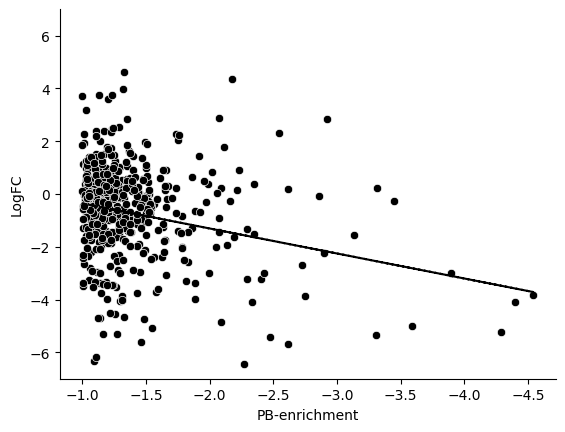

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax=sns.scatterplot(list(mock_enriched.values()),list(mock_dec.values()),color="k")
ax.plot(list(mock_enriched.values()),[float(model.coef_)*i + float(model.intercept_) for i in mock_enriched.values()],linestyle="--",color="k")
ax.set_ylabel("LogFC")
ax.set_xlabel("PB-enrichment")
ax.invert_xaxis()
ax.set_ylim(-7,7)
#ax.set_xlim(0.9,4.4)
sns.despine()

plt.savefig("tsn_mock_PBout.tiff",dpi=600)

In [29]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [69]:
model = LinearRegression().fit(np.array(list(mock_enriched.values())).reshape(-1,1),np.array(list(mock_dec.values())).reshape(-1,1))

In [70]:
model.score(np.array(list(heat_enriched.values())).reshape(-1,1),np.array(list(heat_dec.values())).reshape(-1,1))

0.05303357822168586

In [41]:
stats.pearsonr(list(mock_enriched.values()),list(mock_dec.values()))

PearsonRResult(statistic=-0.03211823577970202, pvalue=0.20674141282548908)

In [53]:
stats.pearsonr(list(mock_enriched.values()),list(mock_dec.values()))

PearsonRResult(statistic=0.24246172749801553, pvalue=7.503222459993758e-08)

In [108]:
stats.pearsonr(list(heat_enriched.values()),list(heat_dec.values()))

PearsonRResult(statistic=-0.042749335666992315, pvalue=0.03253275704053932)

In [83]:
stats.pearsonr(list(heat_enriched.values()),list(heat_dec.values()))

PearsonRResult(statistic=0.24161540230819062, pvalue=6.434182505871486e-05)

C:\Users\nwntas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nwntas\AppData\Local\Temp\ipykernel_17840\3172589784.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0,10**6])


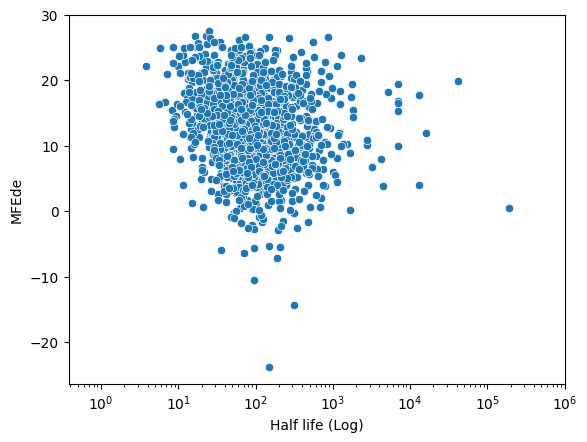

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax=plt.subplots()
sns.scatterplot(list(same.values()),list(same.keys()))
ax.set_xscale("log")
ax.set_xlim([0,10**6])

ax.set_ylabel("MFEde")
ax.set_xlabel("Half life (Log)")
plt.savefig("MFEde_hl_mock.png")

In [279]:
ss=dict(filter(lambda x: x[1]<=10**6,same.items()))

In [280]:
stats.spearmanr(list(ss.keys()),list(ss.values()))

SpearmanrResult(correlation=-0.19856854179054637, pvalue=1.3003817362728262e-13)

In [120]:
import re
#Reference set of ribosomal proteins that are characterized normally as highly expressed
RPs=[]
for i in info:
        a= re.search(r"at\dg\d{5}",i.lower())
        if a:
            RPs+=[(a.group(0)+".1").upper()]

In [121]:
reference=dict(filter(lambda x: x[0] in RPs,codons.items()))

In [7]:
len('AT1G03620.11')

12

In [1]:
#CDS sequences downloaded from TAIR 11
from collections import defaultdict

dic=defaultdict(str)
with open("C:/Users/nwntas/Araport11_cds_20220914") as f:
    line='1'
    while line:
        line=f.readline().strip()
        if ">" in line:
            name=line[1:line.index("|")-1]
            continue
        dic[name]+=line           

In [2]:
cds=dict(dic)

#These are the CDS NOT excluding alternative splicing
#cds=dict(filter(lambda x: len(x[1])%3==0 and set(x[1])-{"A",'C',"G","T"}==set(), cds.items()))

#These are the CDS excluding alternative splicing// No discernible difference regarding distribution or mean 
cds=dict(filter(lambda x: len(x[1])%3==0 and set(x[1])-{"A",'C',"G","T"}==set() and ".1" in x[0] and x[1][:3]=="ATG" and len(x[1])>3 and x[1][-3:]in ['TGA','TAA','TAG'], cds.items()))

codons=dict(map(lambda x: [x[0],[x[1][i:i+3] for i in range(0,len(x[1]),3)]],cds.items()))
#codons=dict(filter(lambda x: x[0] in RPs,codons.items()))

In [234]:
from collections import Counter
#all_codons=[j for i in reference.values() for j in i] #This is for MRCBS values
all_codons=[j for i in codons.values() for j in i]  #This is for corrected RCBS values

codon_freq=Counter(all_codons)

In [235]:
#-11 is to account for the number of codons that do not have A,G,C,T// f_xyz
rela={k:v/(len(all_codons)) for k,v in codon_freq.items()}

In [236]:
l=[(i,j) for i in range(3) for j in ["A","G","C","T"]]

In [237]:
#f_nM
nucleotide_freqs={nucleotide+"_"+str(position):sum(map(lambda y: y[1], filter(lambda x: x[0][position]==nucleotide, codon_freq.items())))/len(all_codons) for position,nucleotide in l}

In [3]:
Gen_code={
    'Phe': ["TTT","TTC"],
    'Leu':["TTA","TTG","CTT","CTC","CTA",'CTG'],
    'Ile':["ATT","ATC","ATA"],
    'Met':["ATG"],
    'Val':["GTT","GTC","GTA","GTG"],
    'Ser':["TCT","TCC","TCA",'TCG',"AGT",'AGC'],
    'Pro':["CCT","CCC","CCA","CCG"],
    'Thr':['ACT',"ACC","ACA","ACG"],
    'Ala':["GCT","GCC","GCA","GCG"],
    'Tyr':["TAT","TAC"],
    'Ter':["TAA","TAG","TGA"],
    'His':["CAT","CAC"],
    'Gln':["CAA","CAG"],
    'Asn':["AAT","AAC"],
    'Lys':["AAA","AAG"],
    'Asp':["GAT","GAC"],
    'Glu':["GAA","GAG"],
    'Cys':["TGT",'TGC'],
    'Trp':["TGG"],
    'Arg':["CGT","CGC","CGA","CGG","AGA","AGG"],
    'Gly':['GGT',"GGC","GGA","GGG"]
}

In [4]:
translation_table={item:k for k,v in Gen_code.items()for item in v}

In [10]:
import numpy as np
RCBS_xyz=dict(map(lambda x: (x[0], {i:rela[i]/np.prod([nucleotide_freqs[f"{i[j]}_{j}"] for j in range(3)]) for i in x[1]}), Gen_code.items()))

In [11]:
def mrcbs (x):
        return np.prod([RCBS_xyz[translation_table[i]][i]/max(RCBS_xyz[translation_table[i]].values()) for i in x])**(1/len(x))

In [45]:
MRCBS_whole={k:mrcbs(v) for k,v in codons.items()}

(array([1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 2.000e+00,
        6.000e+00, 9.000e+00, 1.300e+01, 3.000e+01, 4.800e+01, 6.500e+01,
        1.290e+02, 1.740e+02, 3.660e+02, 6.350e+02, 1.057e+03, 1.896e+03,
        2.972e+03, 4.045e+03, 4.280e+03, 3.612e+03, 2.712e+03, 1.809e+03,
        1.186e+03, 7.460e+02, 4.400e+02, 2.860e+02, 2.290e+02, 1.170e+02,
        1.000e+02, 6.700e+01, 5.000e+01, 3.200e+01, 2.300e+01, 9.000e+00,
        1.100e+01, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([0.4  , 0.412, 0.424, 0.436, 0.448, 0.46 , 0.472, 0.484, 0.496,
        0.508, 0.52 , 0.532, 0.544, 0.556, 0.568, 0.58 , 0.592, 0.604,
        0.616, 0.628, 0.64 , 0.652, 0.664, 0.676, 0.688, 0.7  , 0.712,
        0.724, 0.736, 0.748, 0.76 , 0.772, 0.784, 0.796, 0.808, 0.82 ,
        0.832, 0.844, 0.856, 0.868, 0.88 , 0.892, 0.904, 0.916, 0.928,
        0.94 , 0.952,

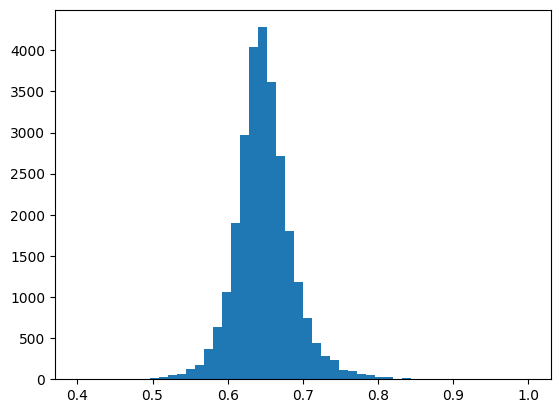

In [55]:
plt.hist(MRCBS_whole.values(),range=[0.4,1],bins=50)

In [60]:
codon_mrcbs={k:{p:q/max(list(v.values()))for p,q in v.items()} for k,v in RCBS_xyz.items() for p,q in v.items()}

In [9]:
import numpy as np
from collections import Counter

class MRCBS:
    def __init__(self, seq):
        self.seq=seq
        
    def __len__(self):
        return len(self.seq)
    
    def codon_frequency(self):
        return dict(Counter(self.seq))
    
    def relative_codon_frequency(self):
        return {k:v/len(self.seq) for k,v in Counter(self.seq).items()}

    def nucleotide_frequencies(self):
        l=[(i,j) for i in range(3) for j in ["A","G","C","T"]]
        return {nucleotide+"_"+str(position):sum(map(lambda y: y[1], filter(lambda x: x[0][position]==nucleotide,Counter(self.seq).items())))/len(self.seq) for position,nucleotide in l}
    
    def translation_table(self):
        return {item:k for k,v in Gen_code.items() for item in v}
    
    def gene_code(self):
        return dict(map(lambda x: (x[0], [item for item in x[1] if item in self.seq]), Gen_code.items()))
    
    def codon_RCBS(self):
        return dict(map(lambda x: (x[0], {i:self.relative_codon_frequency()[i]/np.prod([self.nucleotide_frequencies()[f"{i[j]}_{j}"] for j in range(3)]) for i in x[1]}), self.gene_code().items()))
    
    def corrected_codon_RCBS(self):
        return dict(map(lambda x: (x[0], {i:((self.relative_codon_frequency()[i]*len(self.seq)+rela[i]*500)/(len(self.seq)+500))/np.prod([(self.nucleotide_frequencies()[f"{i[j]}_{j}"]*len(self.seq)+nucleotide_freqs[f"{i[j]}_{j}"]*500)/(len(self.seq)+500) for j in range(3)]) for i in x[1]}), self.gene_code().items()))
    
    def codon_MRCBS(self):
        #return {k:v/max(x.values()) for x in self.codon_RCBS().values() for k,v in x.items()}
        return {k:v/maxo_RCBS[y] for y,x in self.codon_RCBS().items() for k,v in x.items()}
        
    def gene_RCBS(self):
        RCBS_simplified={k:v for x in self.codon_RCBS().values() for k,v in x.items()}
        values={k:v**p for k,v in RCBS_simplified.items() for q,p in self.codon_frequency().items() if k==q}
        return np.prod(list(values.values()))**(1/len(self.seq))-1
    
    def gene_corrected_RCBS(self):
        RCBS_simplified={k:v for x in self.corrected_codon_RCBS().values() for k,v in x.items()}
        values={k:v**p for k,v in RCBS_simplified.items() for q,p in self.codon_frequency().items() if k==q}
        return np.prod(list(values.values()))**(1/len(self.seq))-1
    
    def gene_MRCBS(self):
        values={k:v**p for k,v in self.codon_MRCBS().items() for q,p in self.codon_frequency().items() if k==q}
        return np.prod(list(values.values()))**(1/len(self.seq))

In [120]:
seq=MRCBS(codons['AT1G01040.1'])

In [129]:
seq.gene_corrected_RCBS()

0.11107205462832592

In [9]:
import json
with open(r"C:/Users/nwntas/RCBS_codon_scores.json") as f:
    codon_RCBS=json.load(f)

In [10]:
#Total gene RCBS values
corr={k: MRCBS(v).gene_corrected_RCBS() for k,v in codons.items()}

C:\Users\nwntas\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [15]:
gene_RCBS={k: MRCBS(v).gene_corrected_RCBS() for k,v in codons.items()}

In [11]:
#RCBS values for all aminoacids for all sequences
codon_RCBS={k: MRCBS(v).corrected_codon_RCBS() for k,v in codons.items()}

In [211]:
#Global means of RCBS values for each aminoacid
common_means=defaultdict(list)
for y,x in codon_RCBS.items():
    for k,v in x.items():
        for q,p in v.items():
            common_means[q]+=[p]
            
#common_means=dict(map(lambda x: (x[0],np.mean(x[1])),common_means.items()))
#common_means=dict(sorted(common_means.items(),key=lambda x: x[0]))

In [116]:
len(to_2)

511

In [ ]:
#coRegs definition

In [314]:
df2=pd.read_excel(r"C:\Users\nwntas\co_regulons_new_andria.xlsx", sheet_name="HS APEAL RIP up 0.8")
coRegs_heat=list(df2['Co-regulons'].dropna().unique())

In [315]:
df2=pd.read_excel(r"C:\Users\nwntas\co_regulons_new_andria.xlsx", sheet_name="NS APEAL RIP up 0.8")
coRegs_mock=list(df2['Co-regulons'].dropna().unique())

In [330]:
coRegs_uni=set(coRegs_heat)&set(mock_enriched)

In [ ]:
#LogFC binning

In [357]:
mock_enriched=list(map(lambda x: x+".1",df[df["Log ratio mock"]>1]["geneID"].to_list()))

In [155]:
mock_enriched=list(map(lambda x: x[:-2],mock_enriched))

In [287]:
#to_1_5=df[(df["Log ratio mock"]>0.8) & (df["Log ratio heat"]<=1.5)& (df["geneID"].isin(coRegs_uni))]["geneID"].to_list()
to_1_5=df[(df["Log ratio mock"]>1) & (df["Log ratio mock"]<=1.5)]["geneID"].to_list()

In [288]:
#to_2=df[(df["Log ratio mock"]>1.5) & (df["Log ratio heat"]<=2)& (df["geneID"].isin(coRegs_uni))]["geneID"].to_list()
to_2=df[(df["Log ratio mock"]>1.5) & (df["Log ratio mock"]<=2)]["geneID"].to_list()

In [289]:
#up_2=df[(df["Log ratio mock"]>2)& (df["geneID"].isin(coRegs_uni))]["geneID"].to_list()
up_2=df[(df["Log ratio mock"]>2)]["geneID"].to_list()

In [290]:
first=list(map(lambda x: x[1],filter(lambda x: x[0][:-2] in to_1_5, comp.items())))
second=list(map(lambda x: x[1],filter(lambda x: x[0][:-2] in to_2, comp.items())))
third=list(map(lambda x: x[1],filter(lambda x: x[0][:-2] in up_2, comp.items())))

In [5]:
import json
with open(r"C:/Users/nwntas/RCBS_scores.json") as f:
    MFEde_UTR3=json.load(f)

In [206]:
MFEde_UTR3=dict(map(lambda x: (x[0],x[1][0]), MFEde_UTR3.items()))

In [205]:
import numpy as np
MFEde_UTR3=dict(filter(lambda x: not np.isnan(x[1]), MFEde_UTR3.items()))

In [328]:
#For standard CPM binning
mock_enriched=list(map(lambda x: x+".1",df[df["Log ratio mock"]>1]["geneID"].to_list()))

In [304]:
mock_enriched=list(map(lambda x: x[:-2],mock_enriched))

In [440]:
up_2_5=df[(df["Log ratio mock"]>=1)& (df["DCP1 mock ave"]<=2.5) &(df["geneID"].isin(coRegs_uni))]["geneID"].to_list()

In [441]:
to_4=df[(df["Log ratio mock"]>=0.8)& (df["DCP1 mock ave"]>2.5)& (df["DCP1 mock ave"]<=4) &(df["geneID"].isin(coRegs_uni))]["geneID"].to_list()

In [442]:
up_4=df[(df["Log ratio mock"]>=0.8) &(df["DCP1 mock ave"]>4)&(df["geneID"].isin(coRegs_uni))]["geneID"].to_list()

In [443]:
first=list(map(lambda x: x[1],filter(lambda x: x[0][:-2] in up_2_5, corr.items())))
second=list(map(lambda x: x[1],filter(lambda x: x[0][:-2] in to_4, corr.items())))
third=list(map(lambda x: x[1],filter(lambda x: x[0][:-2] in up_4, corr.items())))

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp
import numpy as np

In [291]:
import scikit_posthocs as sp
results=np.triu(sp.posthoc_dunn([first,second,third], p_adjust = 'bonferroni'),1)
indices=np.nonzero(results)
p_vals=results[indices].tolist()

In [292]:
ps=list(map(lambda x: "ns"if x>=0.05 else "$"+f"{x:.2e}"f"{x}"[:f"{x:.2e}".index("-")].replace("e","\cdot10^{%s}"%f"{x:.2e}"[f"{x:.2e}".index("-"):])+"$",p_vals))

In [446]:
#Adding to p-value report

In [447]:
comb=list(combinations(["<2.5","2.5-4",">4"],2))

In [450]:
for value,combination in zip(p_vals,comb):
    add_p_table("RCBS","Mock",f"coRegulons CPM:{combination[0]}/CPM:{combination[1]}",value)

In [452]:
dd=pd.DataFrame(statistics)

In [482]:
dd.to_csv("RCBS_pvalues.csv",index=False)

In [23]:
from statannot import add_stat_annotation
from itertools import combinations

1-1.5 v.s. 1.5-2: Custom statistical test, P_val:1.000e+00
1.5-2 v.s. >2: Custom statistical test, P_val:1.000e+00
1-1.5 v.s. >2: Custom statistical test, P_val:8.243e-01


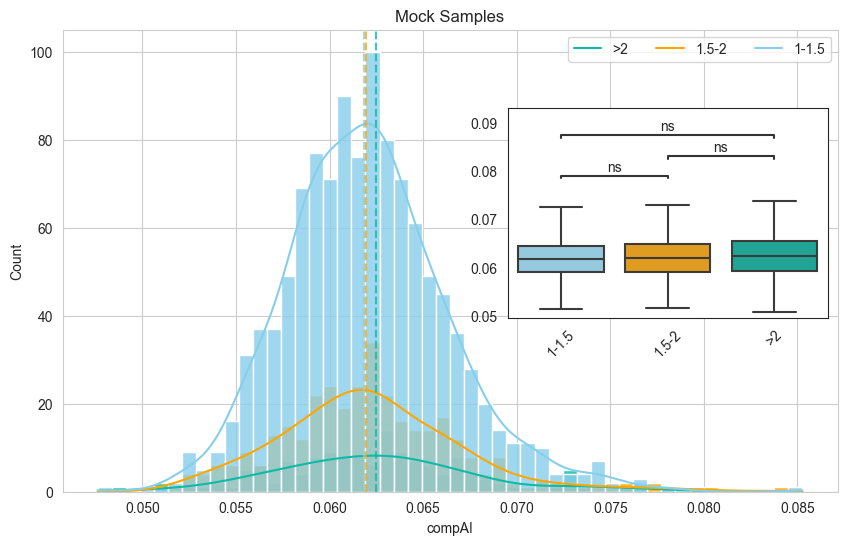

In [294]:
fig, ax = plt.subplots(figsize=(10, 6))

tags=['1-1.5',"1.5-2",">2"] #LogFC
#tags=["<2.5","2.5-4",">4"]  #CPM 
sns.set_style("white")

sns.histplot(data=[first,second,third],bins=50,kde=True,palette=["#87CEEB","#FFA500","#0CBAA6"],alpha=0.8)
#sns.kdeplot(data=[first,second,third],palette=["#87CEEB","#FFA500","#0CBAA6"],fill=True)

ax.axvline(np.median(first),linestyle='--',color="#87CEEB", alpha=0.8)
ax.axvline(np.median(second),linestyle='--',color="#FFA500", alpha=0.8) #For fixed grouping
ax.axvline(np.median(third),linestyle='--',color='#0CBAA6', alpha=0.8)

ax.legend(labels=tags[::-1],ncols=3) #For non-fixed grouping
ax.set_title('Mock Samples')
ax.set_xlabel("compAI")

ax_sub=fig.add_axes([0.57,0.4,0.32,0.35])
sns.set_style("whitegrid")

sec=sns.boxplot(data=[first,second,third], 
            showfliers=False,palette=["#87CEEB","#FFA500","#0CBAA6"])
#sns.stripplot(data=[first,second,third],color="k", 
            #size=2,alpha=0.8)

add_stat_annotation(ax=sec,x=tags,y=[np.median(first),np.median(second),np.median(third)],
                                           box_pairs=list(combinations(tags,2)),
                                           pvalues=p_vals,
                                           text_annot_custom=ps,
                                           text_format="simple",
                                           loc="inside",
                                           perform_stat_test=False,
                                           line_offset_to_box=0.65)



ax_sub.set_xticklabels(tags)

plt.xticks(rotation=45)

plt.savefig("mock_LogFC_binning_compAI_final.tiff",dpi=600)

In [323]:
import json
with open(r"C:\Users\nwntas\RCBS_scores.json") as f:
    corr=json.load(f)

In [347]:
from collections import defaultdict
statistics=defaultdict(list)

def add_p_table(measure,treatment,comparison,results,results_1):
        statistics["Measure"]+=[measure]
        statistics["Treatment"]+=[treatment]
        statistics["Comparison"]+=[comparison]
        statistics["p-value"]+=[results]
        statistics['P-adj']+=[results_1]

In [358]:
enriched_cor=list(map(lambda x:x[1],filter(lambda x: x[0] in mock_enriched,MFEde_UTR3.items())))

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from itertools import combinations
import numpy as np
from scipy import stats

In [359]:
upper_bound=np.quantile(list(MFEde_UTR3.values()),0.75)+5*stats.iqr(list(MFEde_UTR3.values()))
lower_bound=np.quantile(list(MFEde_UTR3.values()),0.25)-5*stats.iqr(list(MFEde_UTR3.values()))
corr_1=list(filter(lambda x: lower_bound<=x<=upper_bound,comp.values()))

In [360]:
comparison=[stats.mannwhitneyu(list(MFEde_UTR3.values()),enriched_cor)[1]]
ps=list(map(lambda x: "ns"if x>=0.05 else "$"+f"{x:.2e}"f"{x}"[:f"{x:.2e}".index("-")].replace("e","\cdot10^{%s}"%f"{x:.2e}"[f"{x:.2e}".index("-"):])+"$",comparison))

Transcriptome v.s. PB-in: Custom statistical test, P_val:1.383e-31


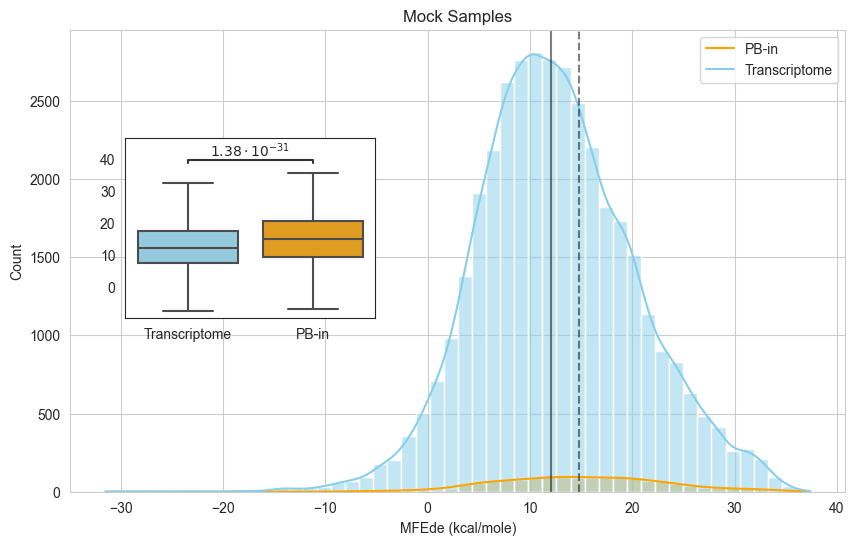

In [363]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set_style("white")

sns.histplot(data=[list(MFEde_UTR3.values()),enriched_cor],bins=50,kde=True,palette=["#87CEEB","#FFA500"])

ax.axvline(np.median(list(MFEde_UTR3.values())),linestyle='-',color='k', alpha=0.5)
ax.axvline(np.median(enriched_cor),linestyle='--',color='k', alpha=0.5) #For fixed grouping

ax.legend(labels=["Transcriptome", "PB-in"][::-1],ncols=1) #For non-fixed grouping
ax.set_title('Mock Samples')
ax.set_xlabel("MFEde (kcal/mole)")

ax_sub=fig.add_axes([0.18, 0.4,0.25,0.3])
sns.set_style("whitegrid")

#second=sns.stripplot(data=[corr_1,enriched_cor],color="k", 
            #size=1,alpha=0.5)

second=sns.boxplot(data=[list(MFEde_UTR3.values()),enriched_cor],showfliers=False,palette=["#87CEEB","#FFA500"])

from statannot import add_stat_annotation
add_stat_annotation(ax=second,x=["Transcriptome", "PB-in"],
                                           y=[np.median(list(MFEde_UTR3.values())),np.median(enriched_cor)],
                                           box_pairs=[("Transcriptome", "PB-in")],
                                           pvalues=comparison,
                                           text_annot_custom=ps,
                                           text_format="simple",
                                           loc="inside",
                                           perform_stat_test=False,
                                           line_offset_to_box=0.5)

ax_sub.set_xticklabels(["Transcriptome", "PB-in"])

plt.savefig("PB_in_vs_transcriptome_MFEdeUTR5_mock_final.tiff",dpi=600)

In [141]:
add_p_table("RCBS","Heat","Whole Transcriptome/ All PB-in",comparison)

In [31]:
from scipy import stats

In [226]:
stats.kruskal(groups["2.0-2.89"],groups["2.89-4.24"],groups["4.24-7.35"],groups["7.35-397.73"]) #No statistical significance for heat binning via Log2FC

KruskalResult(statistic=39.26810806428931, pvalue=1.5228739169129934e-08)

In [59]:
stats.mannwhitneyu(list(corr.values()),enriched_cor)

MannwhitneyuResult(statistic=32789773.5, pvalue=9.089361121247926e-20)

In [2]:
(3/13)**2

0.053254437869822494

In [10]:
import pandas as pd

In [11]:
#identification of impact scores of codons

In [2]:
df=pd.read_excel('C:/Users/nwntas/Enriched transcripts.xlsx', skiprows=[0])

In [295]:
mock_enriched=list(map(lambda x: x+".1",df[df["Log ratio mock"]>1]["geneID"].to_list()))

In [186]:
mock_depleted=list(map(lambda x: x+".1",df[df["Log ratio mock"]<-1]["geneID"].to_list()))

In [237]:
mock_RCBS=dict(filter(lambda x: x[0] in mock_enriched,codon_RCBS.items()))

In [371]:
tr_means=defaultdict(list)
for y,x in codon_enr.items():
    for k,v in x.items():
        for q,p in v.items():
            tr_means[q]+=[p]
tr_means=dict(map(lambda x: (x[0],np.mean(x[1])),tr_means.items()))
#tr_means=dict(sorted(tr_means.items(),key=lambda x: x[0]))

#These are for the calculation of the error by 1 standard deviation
#tr_means_std=dict(map(lambda x: (x[0],np.std(x[1])),tr_means.items()))
#tr_means_std=dict(sorted(tr_means_std.items(),key=lambda x: x[0]))

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

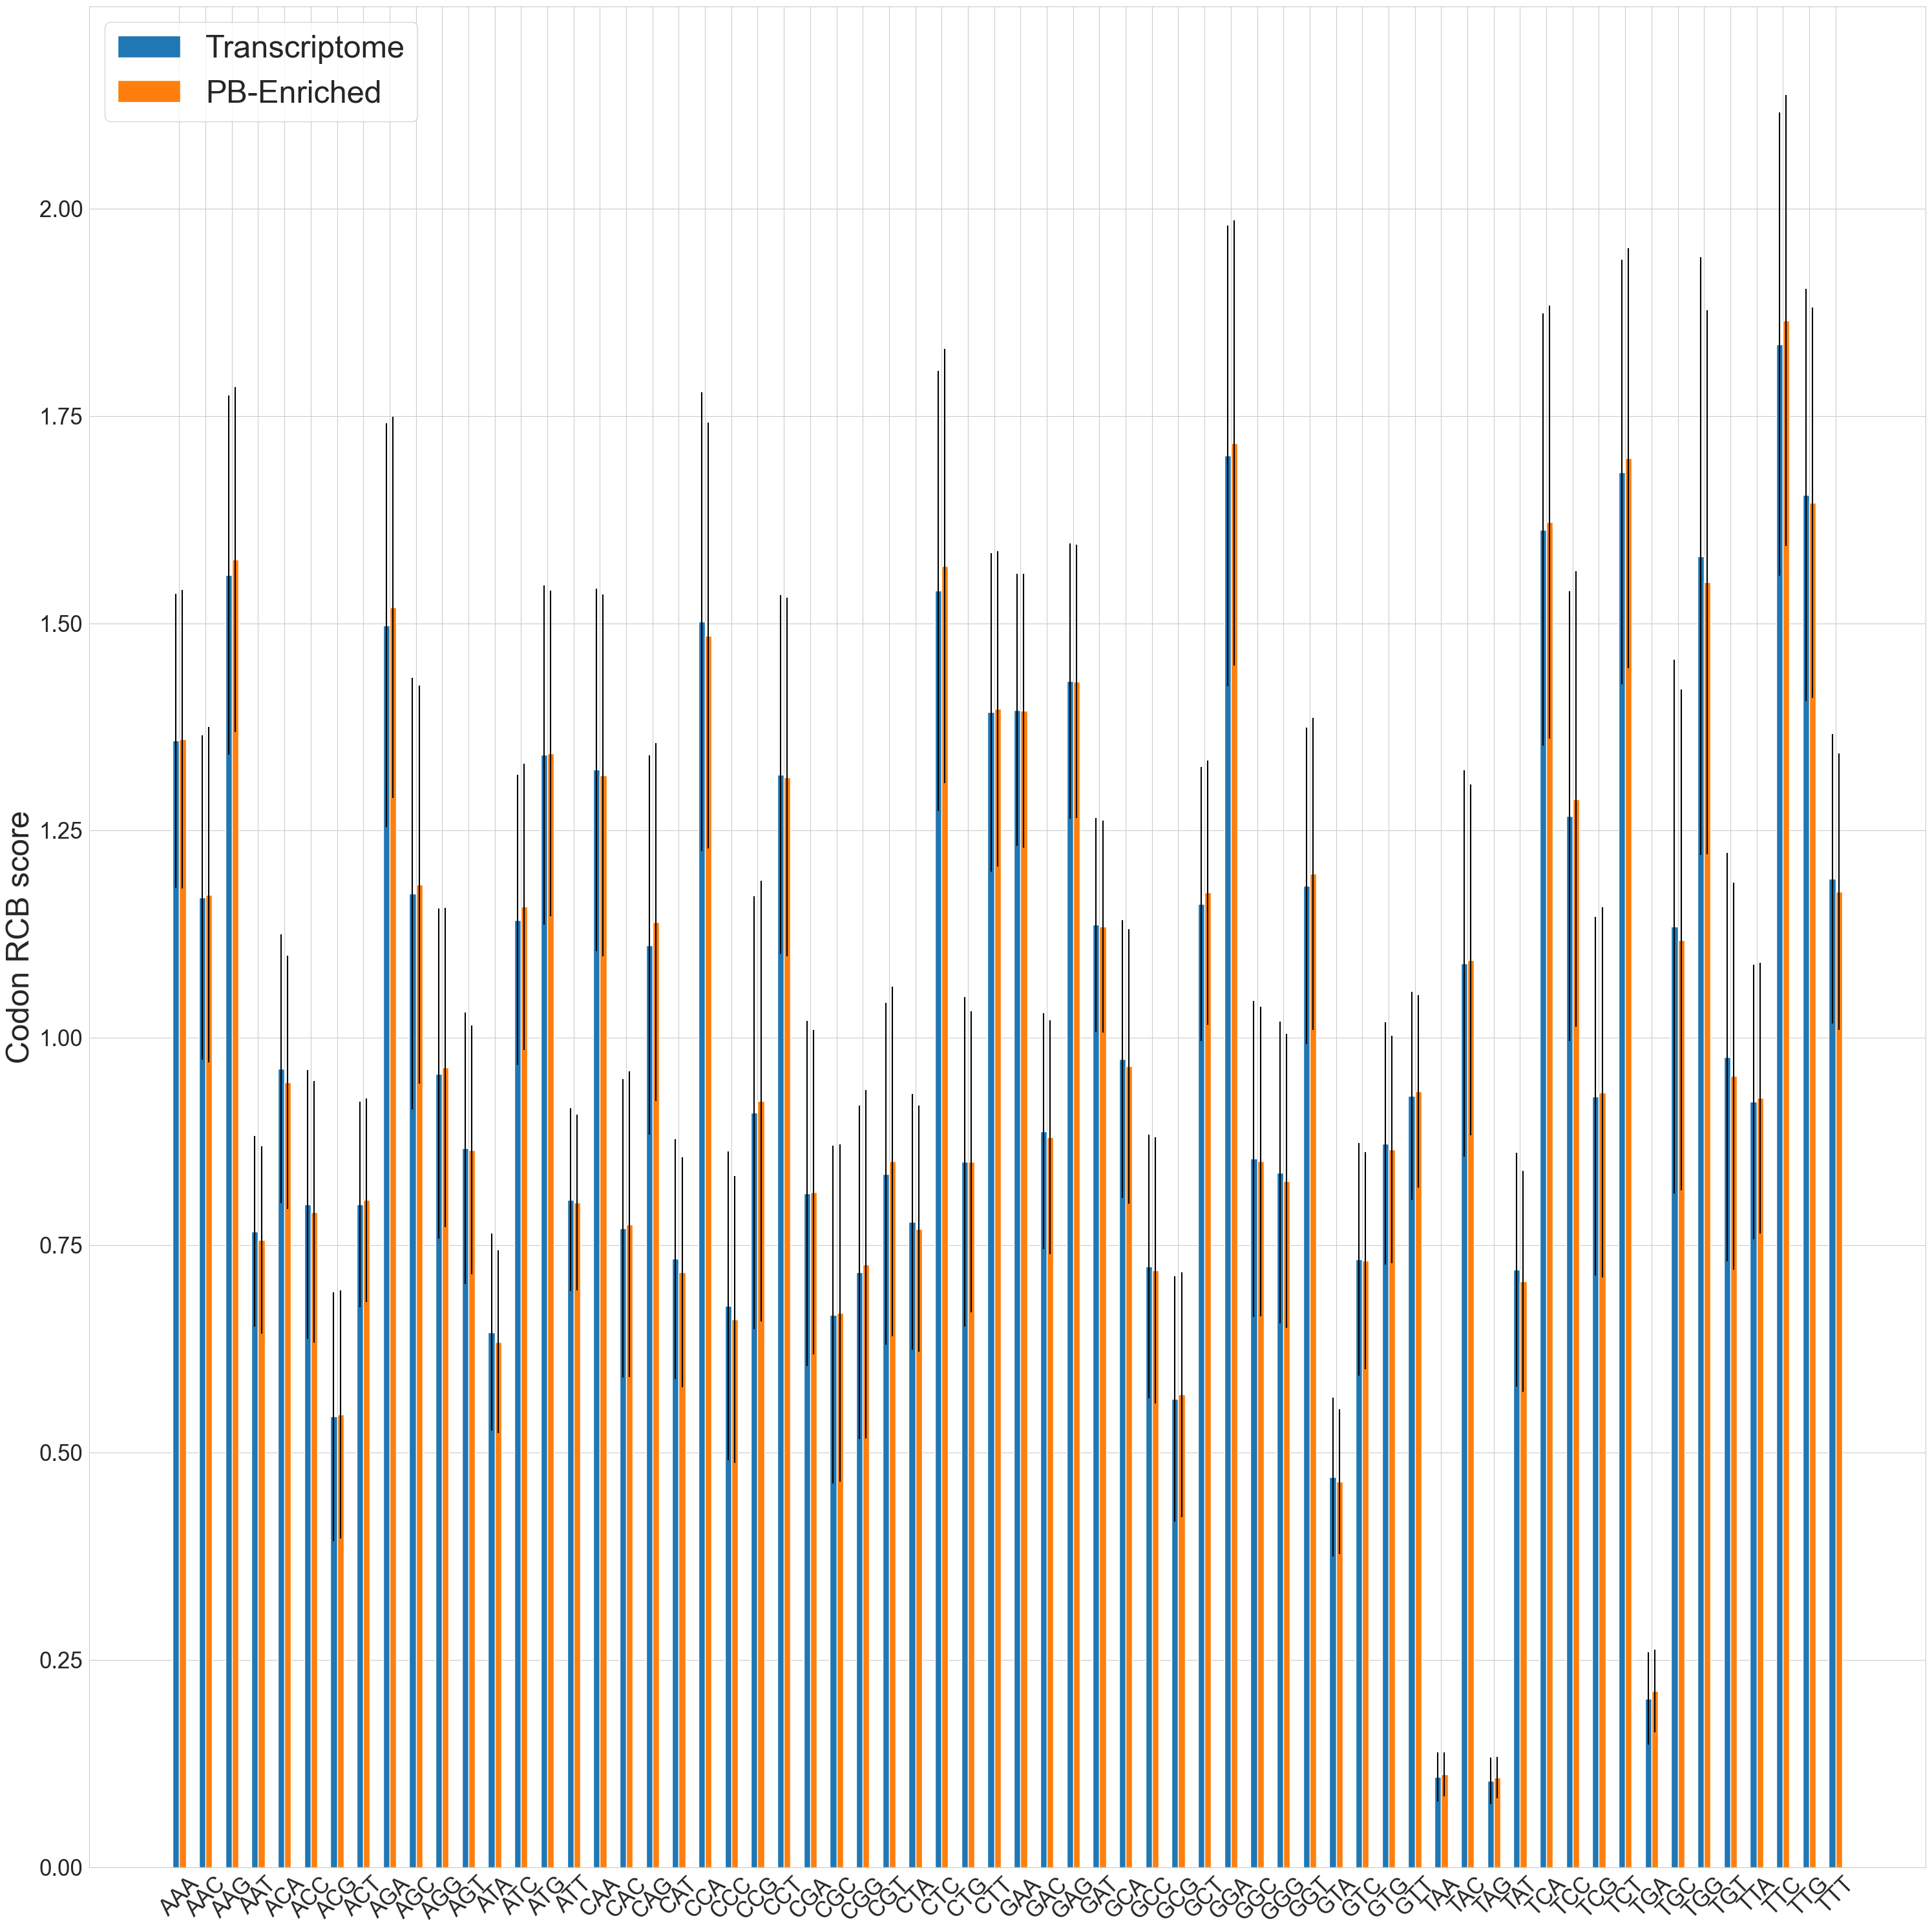

In [240]:
labels = list(mock_means.keys())
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(30,30))
rects1 = ax.bar(x - width/2, list(tr_means.values()), width, label='Transcriptome',yerr=list(tr_means_std.values()))
rects2 = ax.bar(x + width/2, list(mock_means.values()), width, label='PB-Enriched',yerr=list(mock_means_std.values()))
ax.set_xticks(x, labels)
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Codon RCB score", fontdict={"size":35})
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(loc=2, prop={'size': 35})
fig.tight_layout()

plt.savefig("PB_impact_codons_heat.png")

In [29]:
from statsmodels.stats.weightstats import ztest as ztest

In [263]:
#Sorted list of statistically significant impact codons for either overexpressed or PB genes
diff=sorted(dict(filter(lambda x: x[1][0][1]*64<0.05,{k:[ztest(common_means[k], mock_means[k],alternative='smaller'),translation_table[k]] for k in mock_means.keys()}.items())).items(),key=lambda x: x[1][0][1])

In [358]:
comps={k:[ztest(all_means[k], tr_means[k],alternative='smaller')[1],ztest(all_means[k], tr_means[k],alternative='smaller')[1]*64] for k in all_means.keys()}

In [359]:
for k,v in comps.items():
    add_p_table(f"codon RCBS:{k}","Heat", "Whole Transcriptome/PB-in",v[0],v[1])

In [ ]:
measure,treatment,comparison,results,results_1

In [266]:
different_tags=list(map(lambda x: x[0],diff))

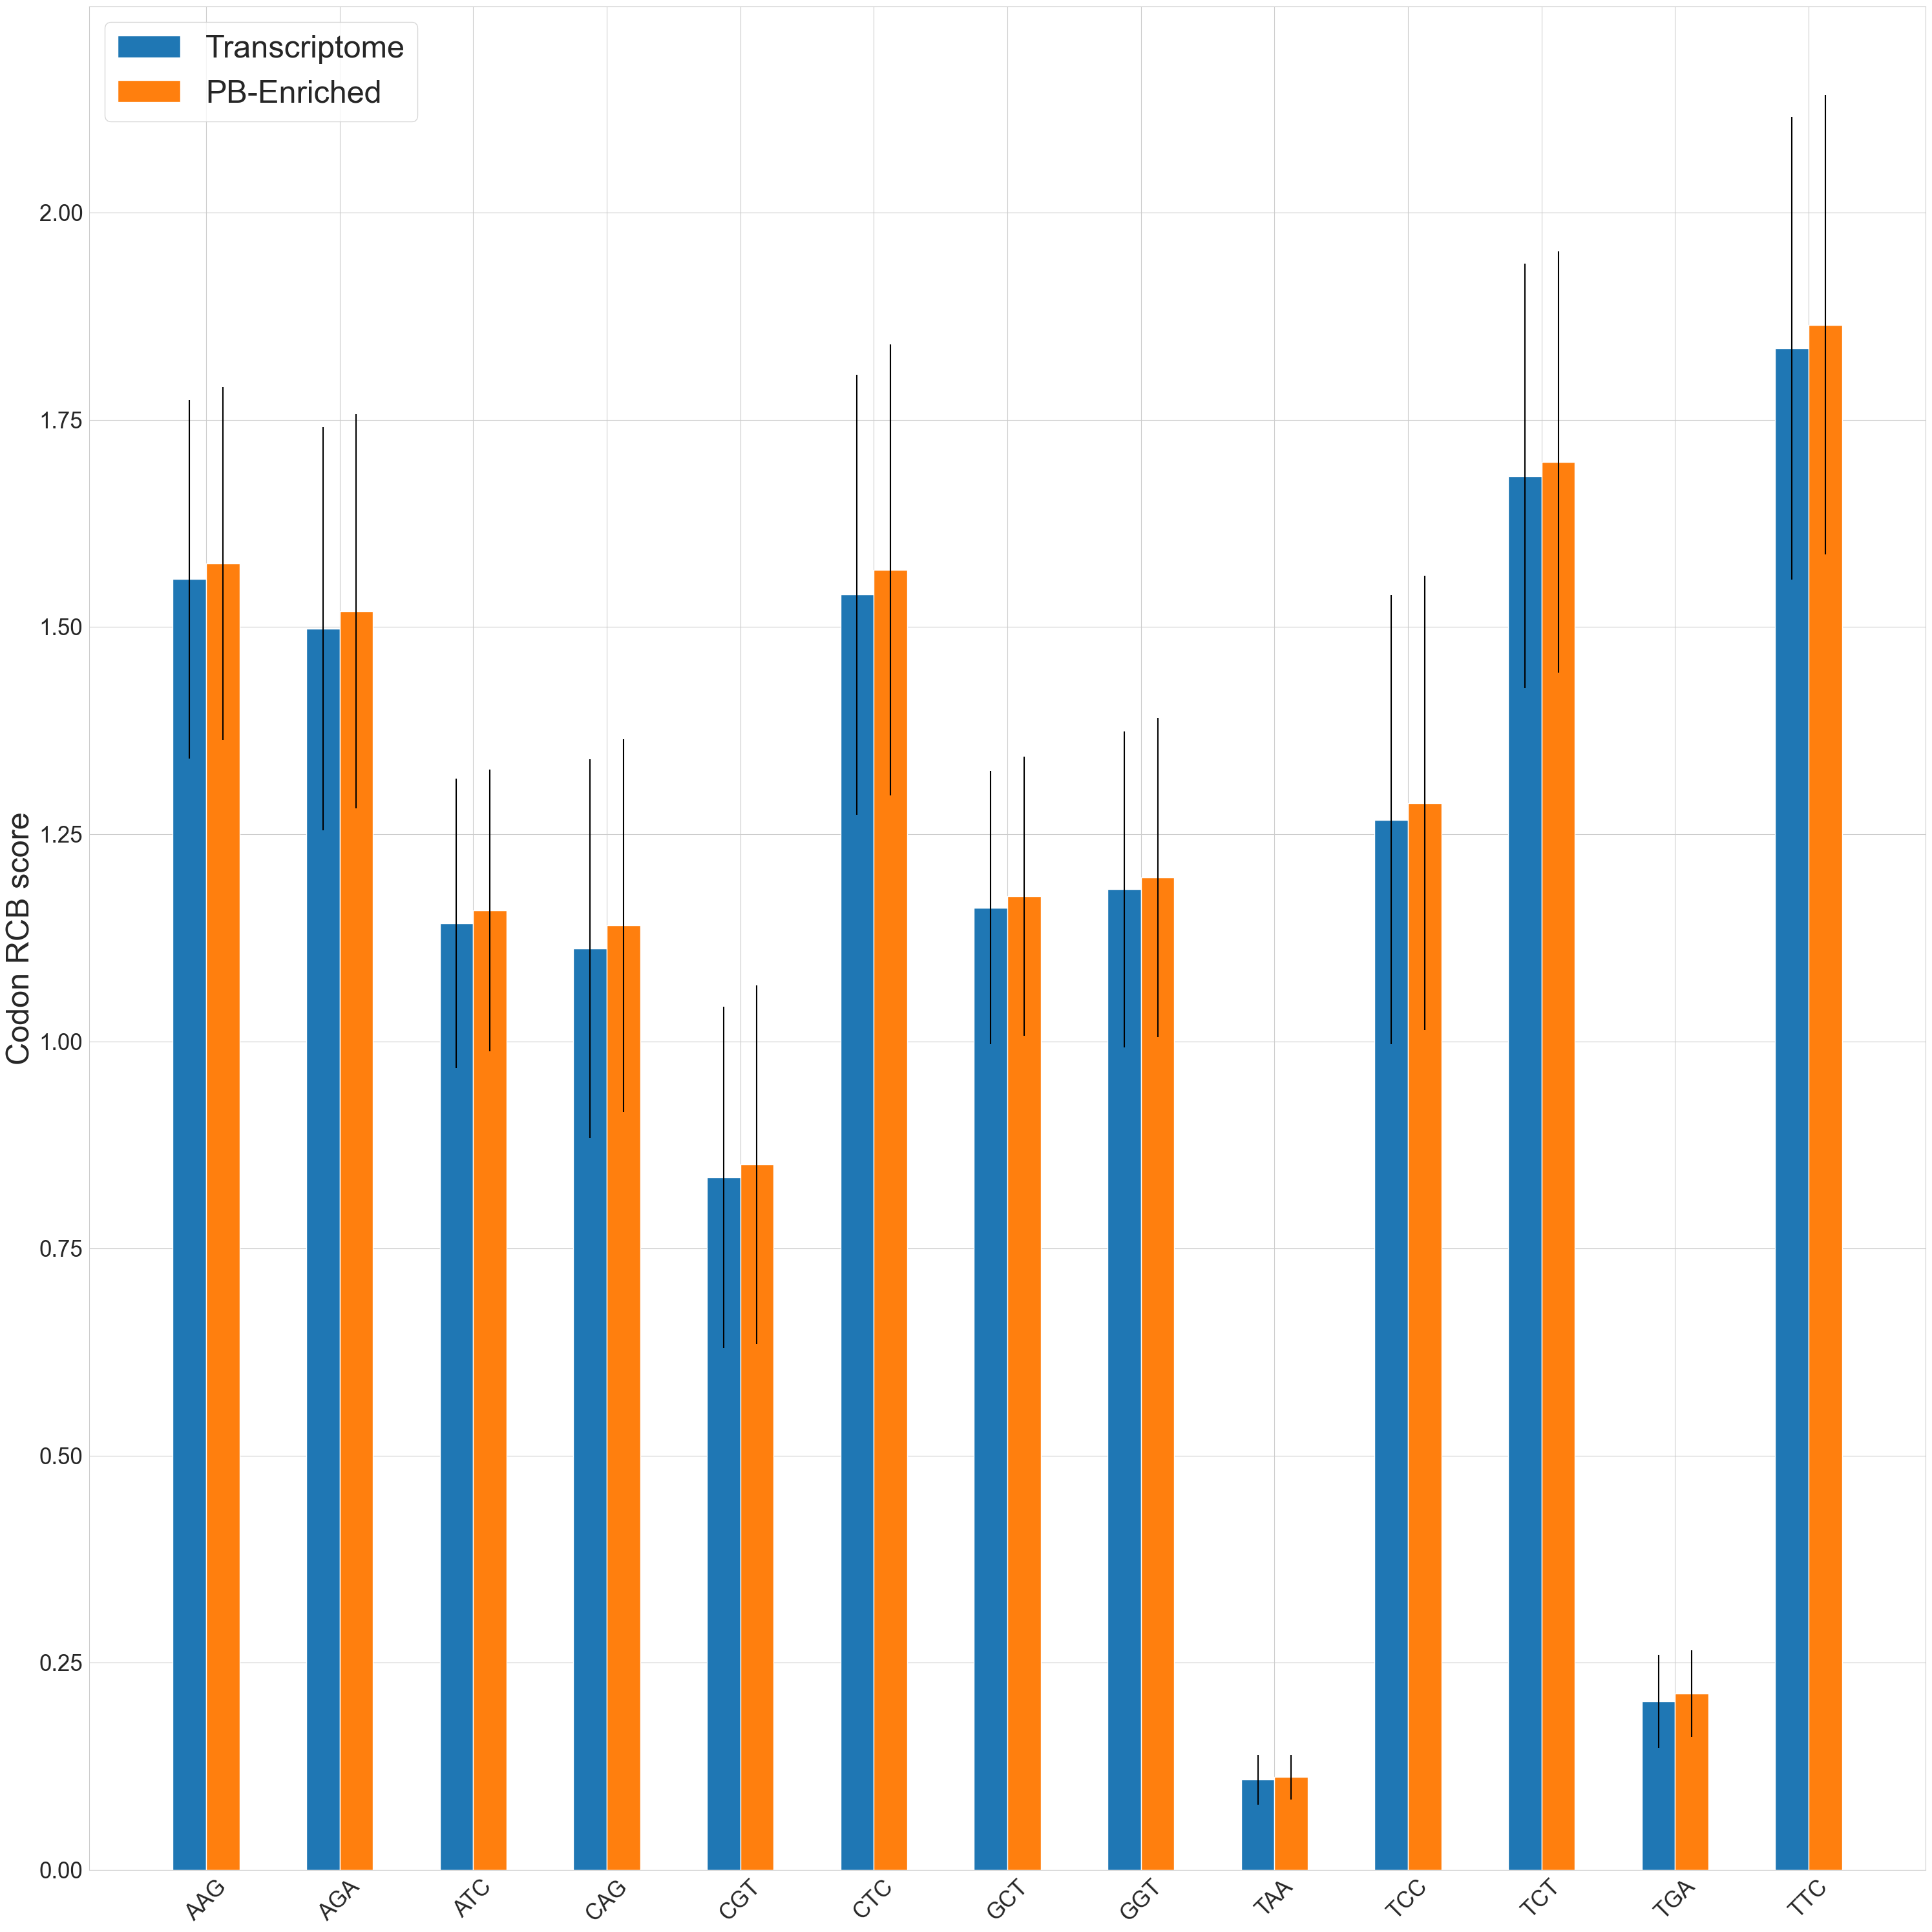

In [278]:
width = 0.25  # the width of the bars

tr_means=dict(filter(lambda x: x[0] in different_tags,tr_means.items()))
tr_means_std=dict(filter(lambda x: x[0] in different_tags,tr_means_std.items()))

mock_means=dict(filter(lambda x: x[0] in different_tags,mock_means.items()))
mock_means_std=dict(filter(lambda x: x[0] in different_tags,mock_means_std.items()))

labels = list(mock_means.keys())
x = np.arange(len(labels)) 


fig, ax = plt.subplots(figsize=(30,30))
rects1 = ax.bar(x - width/2, list(tr_means.values()), width, label='Transcriptome',yerr=list(tr_means_std.values()))
rects2 = ax.bar(x + width/2, list(mock_means.values()), width, label='PB-Enriched',yerr=list(mock_means_std.values()))
ax.set_xticks(x, labels)
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Codon RCB score", fontdict={"size":35})
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(loc=2, prop={'size': 35})
fig.tight_layout()

plt.savefig("PB_impact_codons_mock_only_diff.png")

In [313]:
weights={i:(codon_freq[i]/ max([codon_freq[j] for j in Gen_code[translation_table[i]]])) for i in codon_freq.keys()}

In [240]:
def CAI(seq):
    return np.prod([weights[i] for i in seq])**(1/len(seq))

In [316]:
CAIs={k:CAI(v) for k,v in codons.items()}

In [320]:
max(prs, key=lambda x: x[1][0])

(0.28, (0.5989540852609064, 0.0))

In [317]:
#Calculation of threshold score for RCBS upregulated // based on that the cutoff should be 0.27
from scipy.stats import pearsonr
evaluation_CAI=CAIs
prs=[]
for i in np.arange(0.0,0.30,0.01):
    ids=list(map(lambda y: y[0], filter(lambda x: x[1]>i,corr.items())))
    ref_set=dict(filter(lambda x: x[0] in ids,codons.items()))
    all_codons=[j for i in ref_set.values() for j in i]
    codon_fre=Counter(all_codons)
    weights={i:(codon_fre[i]/ max([codon_fre[j] for j in Gen_code[translation_table[i]]])) for i in codon_fre.keys()}
    test_CAIs={k:CAI(v) for k,v in codons.items()}
    score=pearsonr(list(test_CAIs.values()),list(evaluation_CAI.values()))
    prs+=[(i,score)]

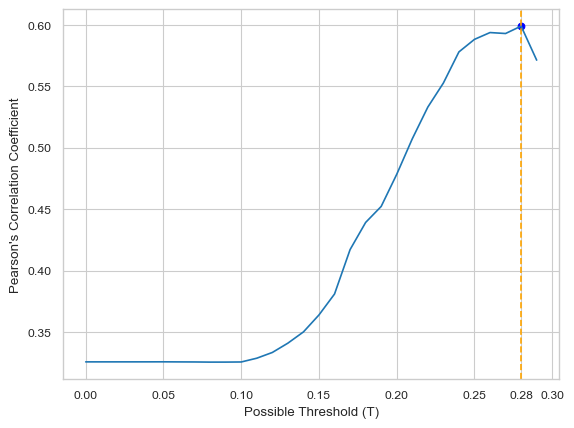

In [338]:
#Distribution of pearson score vs possible cutoff value
fig, ax=plt.subplots()
ax.scatter(x=0.28, y=0.5989540852609064, color='b')
ax.plot(list(np.arange(0.0,0.30,0.01)),list(map(lambda x: x[1][0],prs)))
ax.axvline(x=0.28,color='orange', linestyle="--")
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.28,0.3])
ax.set_ylabel("Pearson's Correlation Coefficient")
ax.set_xlabel("Possible Threshold (T)")
plt.savefig("coef.png")

In [358]:
ids=list(map(lambda y: y[0], filter(lambda x: x[1]>0.27,corr.items())))
ref_set=dict(filter(lambda x: x[0] in ids,codons.items()))

In [25]:
aaa=list(map(lambda x: x[0], filter(lambda x: x[0] in mock_enriched and x[1]>=0.28, corr.items())))

In [26]:
with open(r"C:\Users\nwntas\l.text","x") as f:
    for i in aaa:
        f.write(f"{i}\n")

In [256]:
Rs_modified=dict(filter(lambda x: x[1]!=np.inf and not x[0] in mock_enriched,corr.items()))
Rs_mock=dict(filter(lambda x: x[1]!=np.inf and x[0] in RPs,corr.items()))
Rs_depleted=dict(filter(lambda x: x[1]!=np.inf and x[0] in mock_enriched,corr.items()))

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot([list(Rs_modified.values()),list(Rs_mock.values()),list(Rs_depleted.values())], 
            showfliers=False)


NameError: name 'Rs_modified' is not defined

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Transcriptome v.s. PB-Enriched: Custom statistical test, P_val:1.667e-07


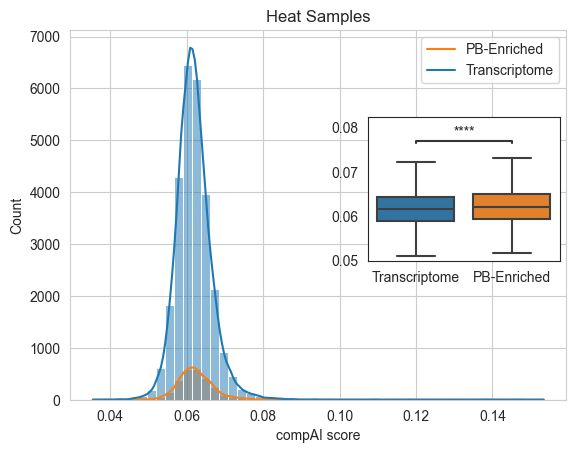

In [297]:
fig, ax=plt.subplots()
sns.set_style("white")
sns.histplot([list(comp.values()),list(comp_enriched.values())],bins=50,kde=True)
ax.legend(labels=['Transcriptome',"PB-Enriched"][::-1])
ax.set_title('Heat Samples')
ax.set_xlabel("compAI score")
ax_sub=fig.add_axes([0.59, 0.4,0.3,0.3])


sns.set_style("whitegrid")
sec=sns.boxplot(data=[list(comp.values()),list(comp_enriched.values())], 
            showfliers=False)

#ax_sub.set_ylabel("compAI score")
ax_sub.set_xticklabels(['Transcriptome',"PB-Enriched"])

add_stat_annotation(ax=sec,x=['Transcriptome',"PB-Enriched"],
                                           y=[np.median(list(comp.values())),np.median(list(comp_enriched.values()))],
                                           box_pairs=[('Transcriptome',"PB-Enriched")],
                                           pvalues=[stats.mannwhitneyu(list(comp.values()),list(comp_enriched.values()))[1]],
                                           text_format="star",
                                           loc="inside",
                                           verbose=1,
                                           perform_stat_test=False,
                                           line_offset_to_box=0.6)

plt.savefig("CompAI_heat_vs_Transcriptome.tiff")

In [73]:
from scipy import stats
stats.normaltest(list(.values()))

NormaltestResult(statistic=141.16478600493966, pvalue=2.22052772221752e-31)

In [140]:
import numpy as np
np.median(list(comp_RP.values())),np.median(list(comp_enriched.values()))

(0.06641243912287201, 0.0618835252823188)

In [141]:
stats.mannwhitneyu(list(comp_RP.values()),list(comp_enriched.values()), alternative="greater")

MannwhitneyuResult(statistic=287550.5, pvalue=2.60283091367734e-40)

In [96]:
cds_length=dict(map(lambda x: (x[0],len(x[1])*3),codons.items()))

In [84]:
w=list(map(lambda y: y[1],filter(lambda x: x[0] in Rs_modified.keys(),cds_length.items())))
np.median(w)

1035.0

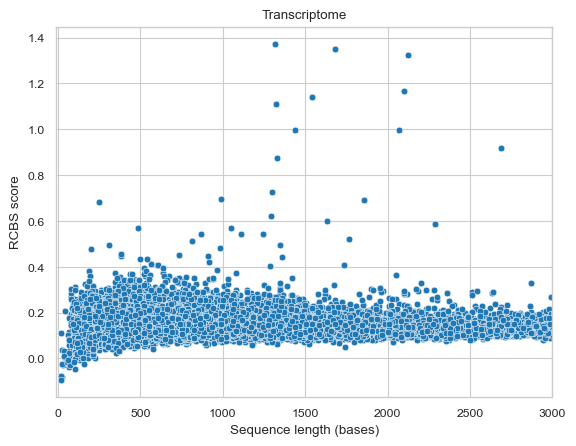

In [99]:
#length bias of RCBS of small sequences// This can be corrected
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper")
#fig, ax=plt.subplots()
ax=sns.scatterplot(x=list(map(lambda y: y[1],filter(lambda x: x[0] in Rs_modified.keys(),cds_length.items()))),
           y=list(Rs_modified.values()), marker='o',edgecolors="face")
ax.set_xlim(-10,3000)
ax.set_xlabel('Sequence length (bases)')
ax.set_ylabel("RCBS score")
ax.set_title("Transcriptome")

plt.savefig("length_independence_transcriptome.png")

#ax.set_xticks(range(0,5000,100))
#ax.set_xticklabels(range(0,5000,100),rotation=90)

In [98]:
from scipy import stats
RC=list(map(lambda y: y[1],filter(lambda x: x[0] in Rs_modified.keys(),cds_length.items())))
Le=list(Rs_modified.values())
stats.spearmanr(Le,RC)

SpearmanrResult(correlation=-0.19180490761216065, pvalue=2.3023371355244285e-227)

In [ ]:
#Estimation of compAI index that could predict translation rate

In [241]:
#Watson-Crick wobble positions
wc={
    "A": ["T","A"],
    "C": ["G","A"],
    "G": ["C","T"],
    "T": ["G","A"]
}

In [242]:
cognates={k:{i:[(i.lower()[:2].replace("a","T").replace("t","A").replace("g","C").replace("c","G")+j)[::-1] for j in wc[i[2]]] for i in v} for k, v in Gen_code.items()}

In [243]:
def near_cognate(anti,amino):
    fi=[]
    for index,i in enumerate(anti):
        nu=["A",'G',"C","T"]
        nu.remove(i)
        for j in nu:
            nc=list(anti)
            nc[index]=j
            fi+=[''.join(nc)]
    return list(filter(lambda x: not x in cognates[amino][anti],fi))

In [244]:
near_cognates={k:{j:near_cognate(j,k) for j in v.keys()}for k,v in cognates.items()}

In [245]:
import re

def extract(row):
    for i in row.to_list():
        m=re.search(r"([AGCT]{3})\s?(\d*)",str(i))
        if m:
            di[m.group(1)]=m.group(2)

In [246]:
from collections import defaultdict
import pandas as pd
#Gene copy number scores
di=defaultdict(str)
for j in range(3,7):
    dd=pd.read_html("http://gtrnadb.ucsc.edu/genomes/eukaryota/Athal10/Athal10-summary.html")[j]
    dd.apply(extract, axis=1)

di={k: int(v) if v!='' else 0 for k,v in di.items()}
di["CAT"]=20

In [258]:
import json
with open(r"C:\Users\nwntas\compAI.json","w") as f:
    json.dump(comp,f)

In [247]:
cognate_sums={p:sum(map(lambda x:di[x],q))for k,v in cognates.items() for p,q in v.items()}

In [248]:
near_cognate_sums={p:sum(map(lambda x:di[x],q))for k,v in near_cognates.items() for p,q in v.items()}

In [249]:
#Calculation of weights based on compAI paper
comp_weights={k:cognate_sums[k]*(cognate_sums[k]/(cognate_sums[k]+near_cognate_sums[k])) for k in cognate_sums.keys()}
comp_weights={k:v/max(comp_weights.values()) for k,v in comp_weights.items()}

In [250]:
def compAI(seq):
    return len(seq)/sum([comp_weights[codon]**(-1) if not codon in ["TGA","TAA","TAG"] else 0 for codon in seq[:-1]])

In [251]:
comp={k:compAI(v) for k,v in codons.items()}

In [296]:
comp_enriched=dict(filter(lambda x: x[0] in mock_enriched,comp.items()))

In [122]:
comp_RP=dict(filter(lambda x: x[0] in RPs,comp.items()))

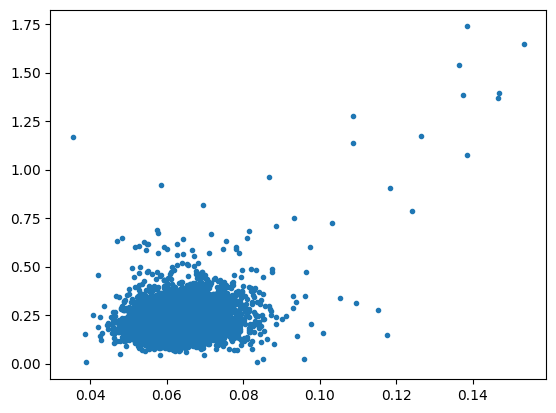

In [43]:
import matplotlib.pyplot as plt
plt.scatter(list(comp.values()), list(corr.values()), marker='.')

In [62]:
type(list(comp.items())[0][1])

float

In [51]:
a=dict(filter(lambda x: x[0] in mock_enriched,comp.items()))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   3.,   2.,   1.,   1.,   1.,   2.,   1.,   2.,
          9.,  10.,  11.,  19.,  17.,  29.,  30.,  39.,  44.,  58.,  72.,
         99., 117., 116., 123., 135., 137., 146., 130., 149., 149., 104.,
         98.,  93., 104.,  85.,  88.,  67.,  60.,  45.,  34.,  35.,  25.,
         14.,  16.,  14.,  24.,   9.,   9.,   8.,  11.,   9.,   6.,   5.,
          4.,   8.,   2.,   4.,   0.,   1.,   0.,   1.,   5.,   1.,   0.,
          3.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.04062608, 0.04114967, 0.04167327, 0.04219687, 0.04272046,
        0.04324406, 0.04376766, 0.04429125, 0.04481485, 0.04533845,
        0.04586204, 0.04638564, 0.04690924, 0.04743283, 0.04795643,
        0.04848003, 0.04900362, 0.04952722, 0.05005082, 0.05057441,
        0.05109801, 0.05162161, 0.0521452 , 0.

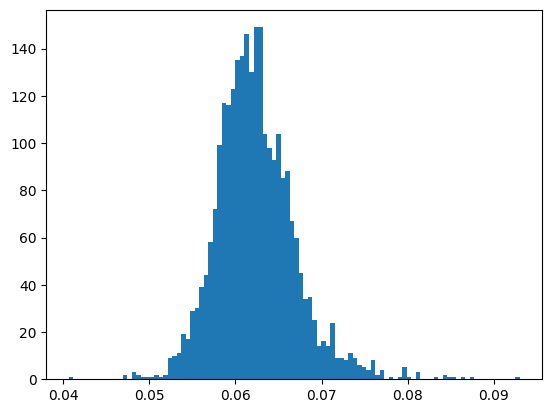

In [73]:
plt.hist(list(a.values()),bins=100)

In [67]:
#It appears that heat enriched genes have statistically significant bigger mean of compAI than the population mean
#That seems to imply that the enriched genes experience low competition and thus have high translation rate
ztest(list(comp.values()),list(a.values()), alternative='smaller')

(-4.48735295248044, 3.6056775982134103e-06)

In [ ]:
##Random trials

In [96]:
#Filtering the genes for nucleotide frequencies close to mean, so that max RCBS of aa are not influenced by 
#repetitive sequences
nuc_freqs=defaultdict(list)
for k,v in codons.items():
    for p,q in MRCBS(v).nucleotide_frequencies().items():
        nuc_freqs[p]+=[q]

In [212]:
mean_nuc_freqs=dict(map(lambda x: (x[0],[(np.mean(x[1])-1.5*np.std(x[1])),(np.mean(x[1])+1.5*np.std(x[1]))]),nuc_freqs.items()))

In [214]:
seqs=[]
for k,v in codons.items():
    freqs= MRCBS(v).nucleotide_frequencies()
    for p,q in freqs.items():
        a=0
        if q<mean_nuc_freqs[p][0] or q>mean_nuc_freqs[p][1]:
            a=1
            break
    if a==1:
        continue
    seqs.append((k,v))

In [216]:
#Estimation of RCBS max values from subset of genes with close to mean nucleotide frequencies
all_codon_RCBS= {k:MRCBS(v).codon_RCBS()for k,v in seqs}

In [217]:
new=defaultdict(list)
for y,x in all_codon_RCBS.items():
    for k,v in x.items():
        for q,p in v.items():
            new[k]+=(y,p)

In [218]:
max_RCBS={k:max(list(filter(lambda x:type(x)!=str,v)))for k,v in new.items()}

In [278]:
#Trying to set the max RCBS of the reference set as the Q3+1.5IQR of the values for each residue//
#based on the premise that the distribution of RCBS for an aminoacid is not normal
Codon_RCBS= {k:MRCBS(v).codon_RCBS()for k,v in codons.items()}

In [283]:
cods=defaultdict(list)
for y,x in Codon_RCBS.items():
    for k,v in x.items():
        for q,p in v.items():
            cods[k]+=[p]
            

In [287]:
maxo_RCBS={k: np.percentile(v,75)+1.5*(np.percentile(v,75)-np.percentile(v,25))for k,v in cods.items()}

In [303]:
#Filtering out sequences that will have a RCBS value bigger than max, so that MRCBS>1 is avoided
norm=[]
for k,v in codons.items():
    rcbs= MRCBS(v).codon_RCBS()
    for p,q in rcbs.items():
        a=0
        if maxo_RCBS[p]< max(list(q.values()),default=-10**3):
            a=1
            break
    if a==1:
        continue
    norm.append((k,v))

In [322]:
MRs={k:MRCBS(v).gene_MRCBS() for k,v in norm}

In [346]:
MRs

{'AT1G01010.1': 0.4708169561911889,
 'AT1G01040.1': 0.0,
 'AT1G01060.1': 0.466474232120271,
 'AT1G01140.1': 0.4691518311772548,
 'AT1G01180.1': 0.4768507271009785,
 'AT1G01190.1': 0.44802132139457107,
 'AT1G01220.1': 0.0,
 'AT1G01240.1': 0.49312116774122816,
 'AT1G01280.1': 0.46452913314665145,
 'AT1G01290.1': 0.47881554892294736,
 'AT1G01320.1': 0.0,
 'AT1G01340.1': 0.4614915202475507,
 'AT1G01355.1': 0.485925929710981,
 'AT1G01390.1': 0.45597380505607704,
 'AT1G01400.1': 0.48168738433555575,
 'AT1G01420.1': 0.46014921228081385,
 'AT1G01430.1': 0.49649107833184436,
 'AT1G01440.1': 0.462751187778508,
 'AT1G01450.1': 0.4644671308801898,
 'AT1G01460.1': 0.4812189876417677,
 'AT1G01480.1': 0.4667710430997954,
 'AT1G01510.1': 0.4533802859563173,
 'AT1G01520.1': 0.4785467157930862,
 'AT1G01550.1': 0.49119034879522805,
 'AT1G01560.1': 0.48536235378154063,
 'AT1G01600.1': 0.4545696145998563,
 'AT1G01610.1': 0.467892854588506,
 'AT1G01630.1': 0.498137892312859,
 'AT1G01650.1': 0.46285395429342

In [181]:
#proof that nucleotide frequency is vastly different for sequences with really high RCBS values for certain residues
#possibly due to repeating sequence motifs.These sequences should be filtered out based on search of common order of 
#magnitude of nucleotide frequencies for all codon positions

#{k:MRCBS(codons[v[v.index(max(list(filter(lambda x:type(x)!=str,v))))-1]]).nucleotide_frequencies() for k,v in new.items()}
{k:v[v.index(max(list(filter(lambda x:type(x)!=str,v))))-1] for k,v in new.items()}

{'Phe': 'AT1G22140.1',
 'Leu': 'AT3G13190.1',
 'Ile': 'AT3G52740.1',
 'Met': 'AT2G02026.1',
 'Val': 'AT1G52342.1',
 'Ser': 'AT5G52547.1',
 'Pro': 'AT3G48140.1',
 'Thr': 'AT1G59723.1',
 'Ala': 'AT3G53294.1',
 'Tyr': 'AT2G42210.1',
 'Ter': 'AT3G19030.1',
 'His': 'AT5G61310.1',
 'Gln': 'AT3G54363.1',
 'Asn': 'AT3G13970.1',
 'Lys': 'AT3G01572.1',
 'Asp': 'AT4G25707.1',
 'Glu': 'AT2G30760.1',
 'Cys': 'AT3G20180.1',
 'Trp': 'AT4G30730.1',
 'Arg': 'AT5G34829.1',
 'Gly': 'AT2G13275.1'}

In [235]:
import matplotlib.pyplot as plt

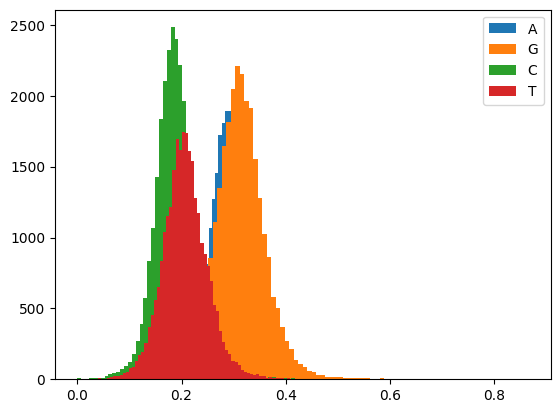

In [247]:
for i in ["A","G","C","T"]:
    plt.hist(nuc_freqs[f"{i}_0"],bins=100)
plt.legend(["A","G","C","T"])

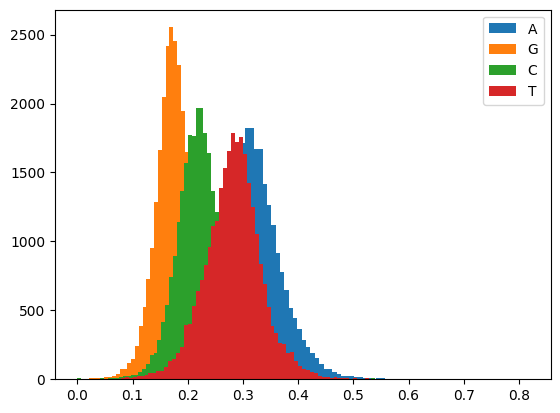

In [248]:
for i in ["A","G","C","T"]:
    plt.hist(nuc_freqs[f"{i}_1"],bins=100)
plt.legend(["A","G","C","T"])

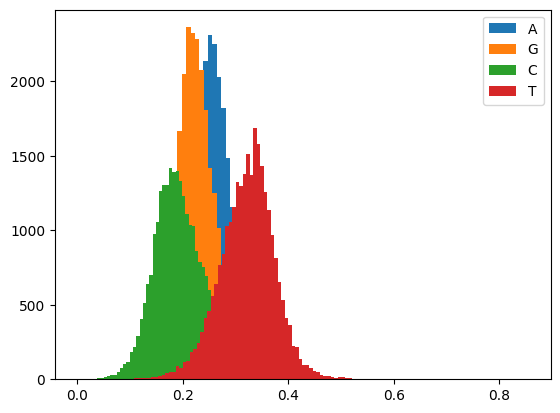

In [252]:
for i in ["A","G","C","T"]:
    plt.hist(nuc_freqs[f"{i}_2"],bins=100)
plt.legend(["A","G","C","T"])

In [ ]:
#Relative frequency considerations and cross-reference with the RCBS and compAI indices

In [15]:
import pandas as pd
from collections import Counter

In [299]:
df=pd.read_excel('C:/Users/nwntas/Enriched transcripts.xlsx', skiprows=[0])

In [349]:
PB_in=df[(df['Log ratio mock']>1) & (df["geneID"].isin(list(map(lambda x:x[:-2],codons.keys()))))]["geneID"].to_list()

In [350]:
PB_out=df[(df['Log ratio mock']<-1) & (df["geneID"].isin(list(map(lambda x:x[:-2],codons.keys()))))]["geneID"].to_list()

In [351]:
PB_i=dict(filter(lambda x: x[0][:-2] in PB_in, codons.items()))

In [352]:
PB_o=dict(filter(lambda x: x[0][:-2] in PB_out, codons.items()))

In [353]:
PB_all=dict(filter(lambda x: not (x[0][:-2] in PB_in or x[0][:-2] in PB_out), codons.items()))

In [20]:
#For aminoacid plot
PB_in_freqs={k:{p:sum([Counter(v)[j] for j in q])/len(v)for p,q in Gen_code.items()} for k,v in PB_i.items()}

In [ ]:
#For aminoacid plot
PB_out_freqs={k:{p:sum([Counter(v)[j] for j in q])/len(v)for p,q in Gen_code.items()} for k,v in PB_o.items()}

In [18]:
#For aminoacid plot
PB_all_freqs={k:{p:sum([Counter(v)[j] for j in q])/len(v)for p,q in Gen_code.items()} for k,v in PB_all.items()}

In [354]:
#For GC plots
PB_in_freqs={k:{p:sorted([(j,Counter(v)[j]/len(v)) for j in q],key=lambda x: x[0].count("C")+x[0].count("G")) for p,q in Gen_code.items()} for k,v in PB_i.items()}

In [355]:
#For GC plots
PB_out_freqs={k:{p:sorted([(j,Counter(v)[j]/len(v)) for j in q],key=lambda x: x[0].count("C")+x[0].count("G")) for p,q in Gen_code.items()} for k,v in PB_o.items()}

In [356]:
#For GC plots
PB_all_freqs={k:{p:sorted([(j,Counter(v)[j]/len(v)) for j in q],key=lambda x: x[0].count("C")+x[0].count("G")) for p,q in Gen_code.items()} for k,v in PB_all.items()}

In [380]:
PB_in_distr=defaultdict(list)

In [394]:
for v in PB_in_freqs.values():
    for p,q in v.items():
        PB_in_distr[p]+=[q]
PB_in_distr=dict(PB_in_distr)

#For the plot with GC%
#PB_in_distr={q: list(map(lambda x: x[1],filter(lambda x: x[0]==q,v))) for k,v in PB_in_distr.items() for q in sorted(Gen_code[k],key=lambda x: x.count("C")+x.count("G"))}

In [378]:
sorted(Gen_code["Lys"],key=lambda x: x.count("C")+x.count("G"))

['AAA', 'AAG']

In [16]:
float(map(lambda x: x[1],list(filter(lambda x: x[0]=="AAA"))) for i in PB_in_distr["Lys"] if list(filter(lambda x: x[0]=="AAA")) else 0

In [341]:
import numpy as np

In [363]:
log_ratios={k: np.log2(np.mean(v)/np.mean(PB_all_distr[k])) for k,v in PB_in_distr.items()}
log_ratios={k:sorted([(j,log_ratios[j]) for j in v],key=lambda x: x[0].count("G")+x[0].count("C")) for k,v in Gen_code.items()}
log_ratios={k:[i[1] for i in v]for k,v in log_ratios.items()}

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> None

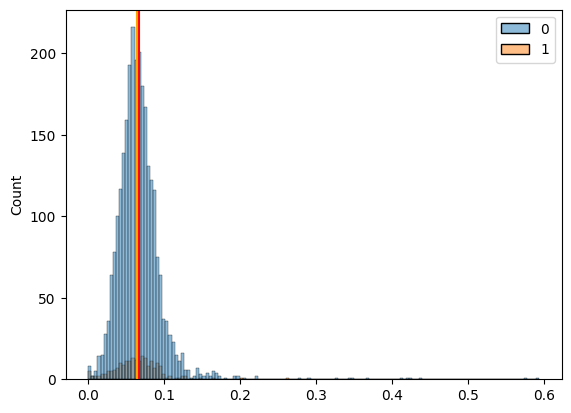

In [119]:
fig, ax=plt.subplots()
sns.histplot([PB_in_distr["Gly"],PB_out_distr["Gly"]])
ax.axvline(np.mean(PB_in_distr["Gly"]),color="red")

ax.axvline(np.mean(PB_out_distr["Gly"]),color="orange")

In [4]:
from collections import defaultdict

In [1]:
import json
with open(r"C:\Users\nwntas\amino_freqs.json")as f:
    aa_freqs=json.load(f)

In [2]:
aa_freqs

{'AT1G01010.1': {'Phe': 0.03953488372093023,
  'Leu': 0.05813953488372093,
  'Ile': 0.06279069767441861,
  'Met': 0.020930232558139535,
  'Val': 0.06279069767441861,
  'Ser': 0.10697674418604651,
  'Pro': 0.046511627906976744,
  'Thr': 0.03953488372093023,
  'Ala': 0.030232558139534883,
  'Tyr': 0.044186046511627906,
  'Ter': 0.002325581395348837,
  'His': 0.027906976744186046,
  'Gln': 0.06046511627906977,
  'Asn': 0.06046511627906977,
  'Lys': 0.05581395348837209,
  'Asp': 0.06744186046511629,
  'Glu': 0.07674418604651163,
  'Cys': 0.009302325581395349,
  'Trp': 0.02558139534883721,
  'Arg': 0.044186046511627906,
  'Gly': 0.05813953488372093},
 'AT1G01020.1': {'Phe': 0.07317073170731707,
  'Leu': 0.13821138211382114,
  'Ile': 0.11382113821138211,
  'Met': 0.04065040650406504,
  'Val': 0.07317073170731707,
  'Ser': 0.08536585365853659,
  'Pro': 0.024390243902439025,
  'Thr': 0.028455284552845527,
  'Ala': 0.06097560975609756,
  'Tyr': 0.036585365853658534,
  'Ter': 0.00406504065040650

In [382]:
PB_in_freqs=dict(filter(lambda x: x[0] in mock_enriched,aa_freqs.items()))

In [383]:
PB_in_distr=defaultdict(list)

In [384]:
for v in PB_in_freqs.values():
    for p,q in v.items():
        PB_in_distr[p]+=[q]
PB_in_distr=dict(PB_in_distr)

In [365]:
import numpy as np

final_in={k:np.median(v) for k,v in PB_in_distr.items()}
#final_out={k:np.median(v)for k,v in PB_out_distr.items()}
final_all={k:np.median(v)for k,v in PB_all_distr.items()}

In [88]:
in_codons=Counter([j for i in PB_i.values() for j in i])
out_codons=Counter([j for i in PB_o.values() for j in i])
all_codons=Counter([j for i in PB_all.values() for j in i])

In [89]:
fic={k: v/sum(in_codons.values())for k,v in in_codons.items()}
foc={k: v/sum(out_codons.values())for k,v in out_codons.items()}
fall={k: v/sum(all_codons.values())for k,v in all_codons.items()}

In [90]:
sic={k:sum([fic[i] for i in v]) for k,v in Gen_code.items()}
soc={k:sum([foc[i] for i in v]) for k,v in Gen_code.items()}
sall={k:sum([fall[i] for i in v]) for k,v in Gen_code.items()}

In [24]:
import matplotlib.pyplot as plt
import numpy as np

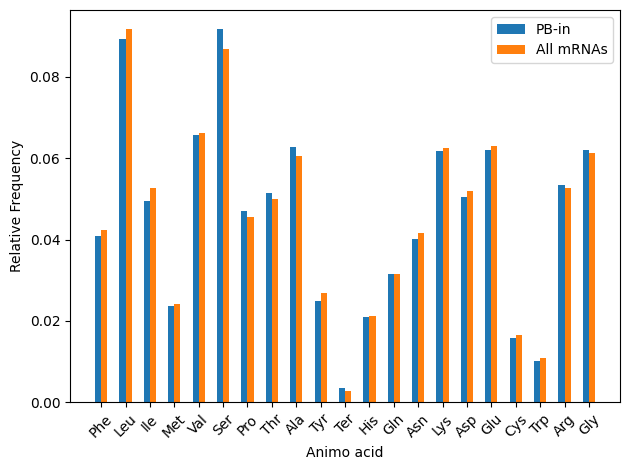

In [26]:
labels = list(final_in.keys())
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, list(final_in.values()), width, label='PB-in')
rects2 = ax.bar(x + width/2, list(final_all.values()), width, label='All mRNAs')
#rects3 = ax.bar(x + 1.5*width, list(final_out.values()), width, label='PB-out')

ax.set_xticks(x, labels)
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Relative Frequency")
ax.set_xlabel("Animo acid")

plt.legend()

fig.tight_layout()
#plt.savefig("relative_freq_mock.tiff")

In [367]:
diff=sorted(dict(filter(lambda x: x[1][0][1]<0.05/20,{k:[ztest(PB_in_distr[k], PB_all_distr[k],alternative='larger')] for k in PB_all_distr.keys()}.items())).items(),key=lambda x: x[1][0][1])

In [368]:
diffe=[i[0] for i in diff]

In [385]:
comps={k:[ztest(PB_in_distr[k], PB_all_distr[k],alternative='larger')[1],ztest(PB_in_distr[k], PB_all_distr[k],alternative='larger')[1]*20] for k in PB_all_distr.keys()}

In [387]:
for k,v in comps.items():
    add_p_table(f"Amino acid Frequency:{k}","Mock", "Whole Transcriptome/PB-in",v[0],v[1])

In [369]:
final_in_d=dict(filter(lambda x: x[0] in diffe,final_in.items()))
final_all_d=dict(filter(lambda x: x[0] in diffe,final_all.items()))

In [280]:
import seaborn as sns

In [281]:
from matplotlib import gridspec

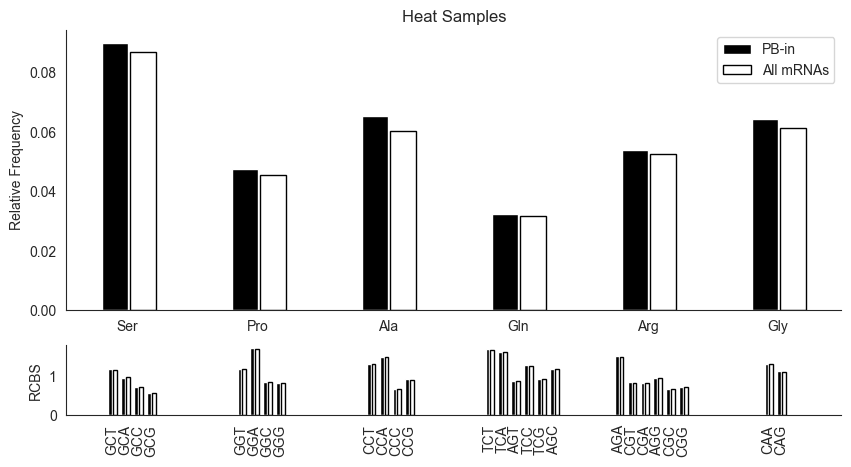

In [374]:
gs=gridspec.GridSpec(2,1,height_ratios=[4,1])
sns.set_style("white")
plt.figure(figsize=(10,5))
labels = list(final_in_d.keys())
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
width_1 = 0.03

ax = plt.subplot(gs[0,0])
rects1 = ax.bar(x - width/2, list(final_in_d.values()), width, label='PB-in',color="k")
rects2 = ax.bar(x + width/2+0.02, list(final_all_d.values()), width, label='All mRNAs',color="white",edgecolor="k")

ax.set_xticks(x, labels)
ax.set_xticklabels(labels)
ax.set_ylabel("Relative Frequency")

ax1=plt.subplot(gs[1,0])
ax1.set_xticks(np.arange(0,7,1))
ax1.set_xlim([-0.5,5.5])

q=defaultdict(float)

for c,i in enumerate(diffe):
    for item,codon in enumerate(sorted(Gen_code[i],key=lambda x: x.count("A")+x.count("T"),reverse=True)):
        ax1.bar((c-len(Gen_code[i])*width/5)+item*width/2, tr_means[codon], width_1,color="k")
        ax1.bar((c-len(Gen_code[i])*width/5)+item*width/2+width_1+0.008, all_means[codon], width_1,color="white",edgecolor="k")
        q[codon]=(c-len(Gen_code[i])*width/5)+item*width/2+width_1/2

plt.xticks(list(q.values()))
ax1.set_xticklabels(list(q.keys()),rotation=90)

ax1.set_ylabel("RCBS")
ax.set_title("Heat Samples")

ax.legend()

sns.despine()
plt.savefig("Enriched_aminos_heat.tiff")

In [59]:
with open(r"C:\Users\nwntas\RCBS_codon_scores.json") as f:
    codon_RCBS=json.load(f)

In [147]:
sorted(Gen_code["Ala"],key=lambda x: x.count("A")+x.count("T"),reverse=True)

['GCT', 'GCA', 'GCC', 'GCG']

In [356]:
codon_enr=dict(filter(lambda x: x[0] in mock_enriched,codon_RCBS.items()))

In [53]:
rrs={k: sorted([(i,rela[i]) for i in v], key=lambda x: x[0].count("G")+x[0].count("C")) for k,v in Gen_code.items()}

In [54]:
enr_codons={k:v for k,v in codons.items() if k in mock_enriched}

In [55]:
rrs_enr={k: sorted([(i,rela[i]) for i in v], key=lambda x: x[0].count("G")+x[0].count("C")) for k,v in Gen_code.items()}

In [56]:
plott={k: [np.log2(i[1]/list(filter(lambda x: x[0]==i[0], rrs[k]))[0][1]) for i in v]for k,v in rrs_enr.items()}

In [ ]:
labels = list(sic.keys())
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
for i in 
rects1 = ax.bar(x - width/2, list(sic.values()), width, label='PB-in')
rects2 = ax.bar(x + width/2, list(sall.values()), width, label='All mRNAs')
rects3 = ax.bar(x + 1.5*width, list(soc.values()), width, label='PB-out')

ax.set_xticks(x, labels)
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Relative Frequency")
ax.set_xlabel("Animoacid")

plt.legend()

fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


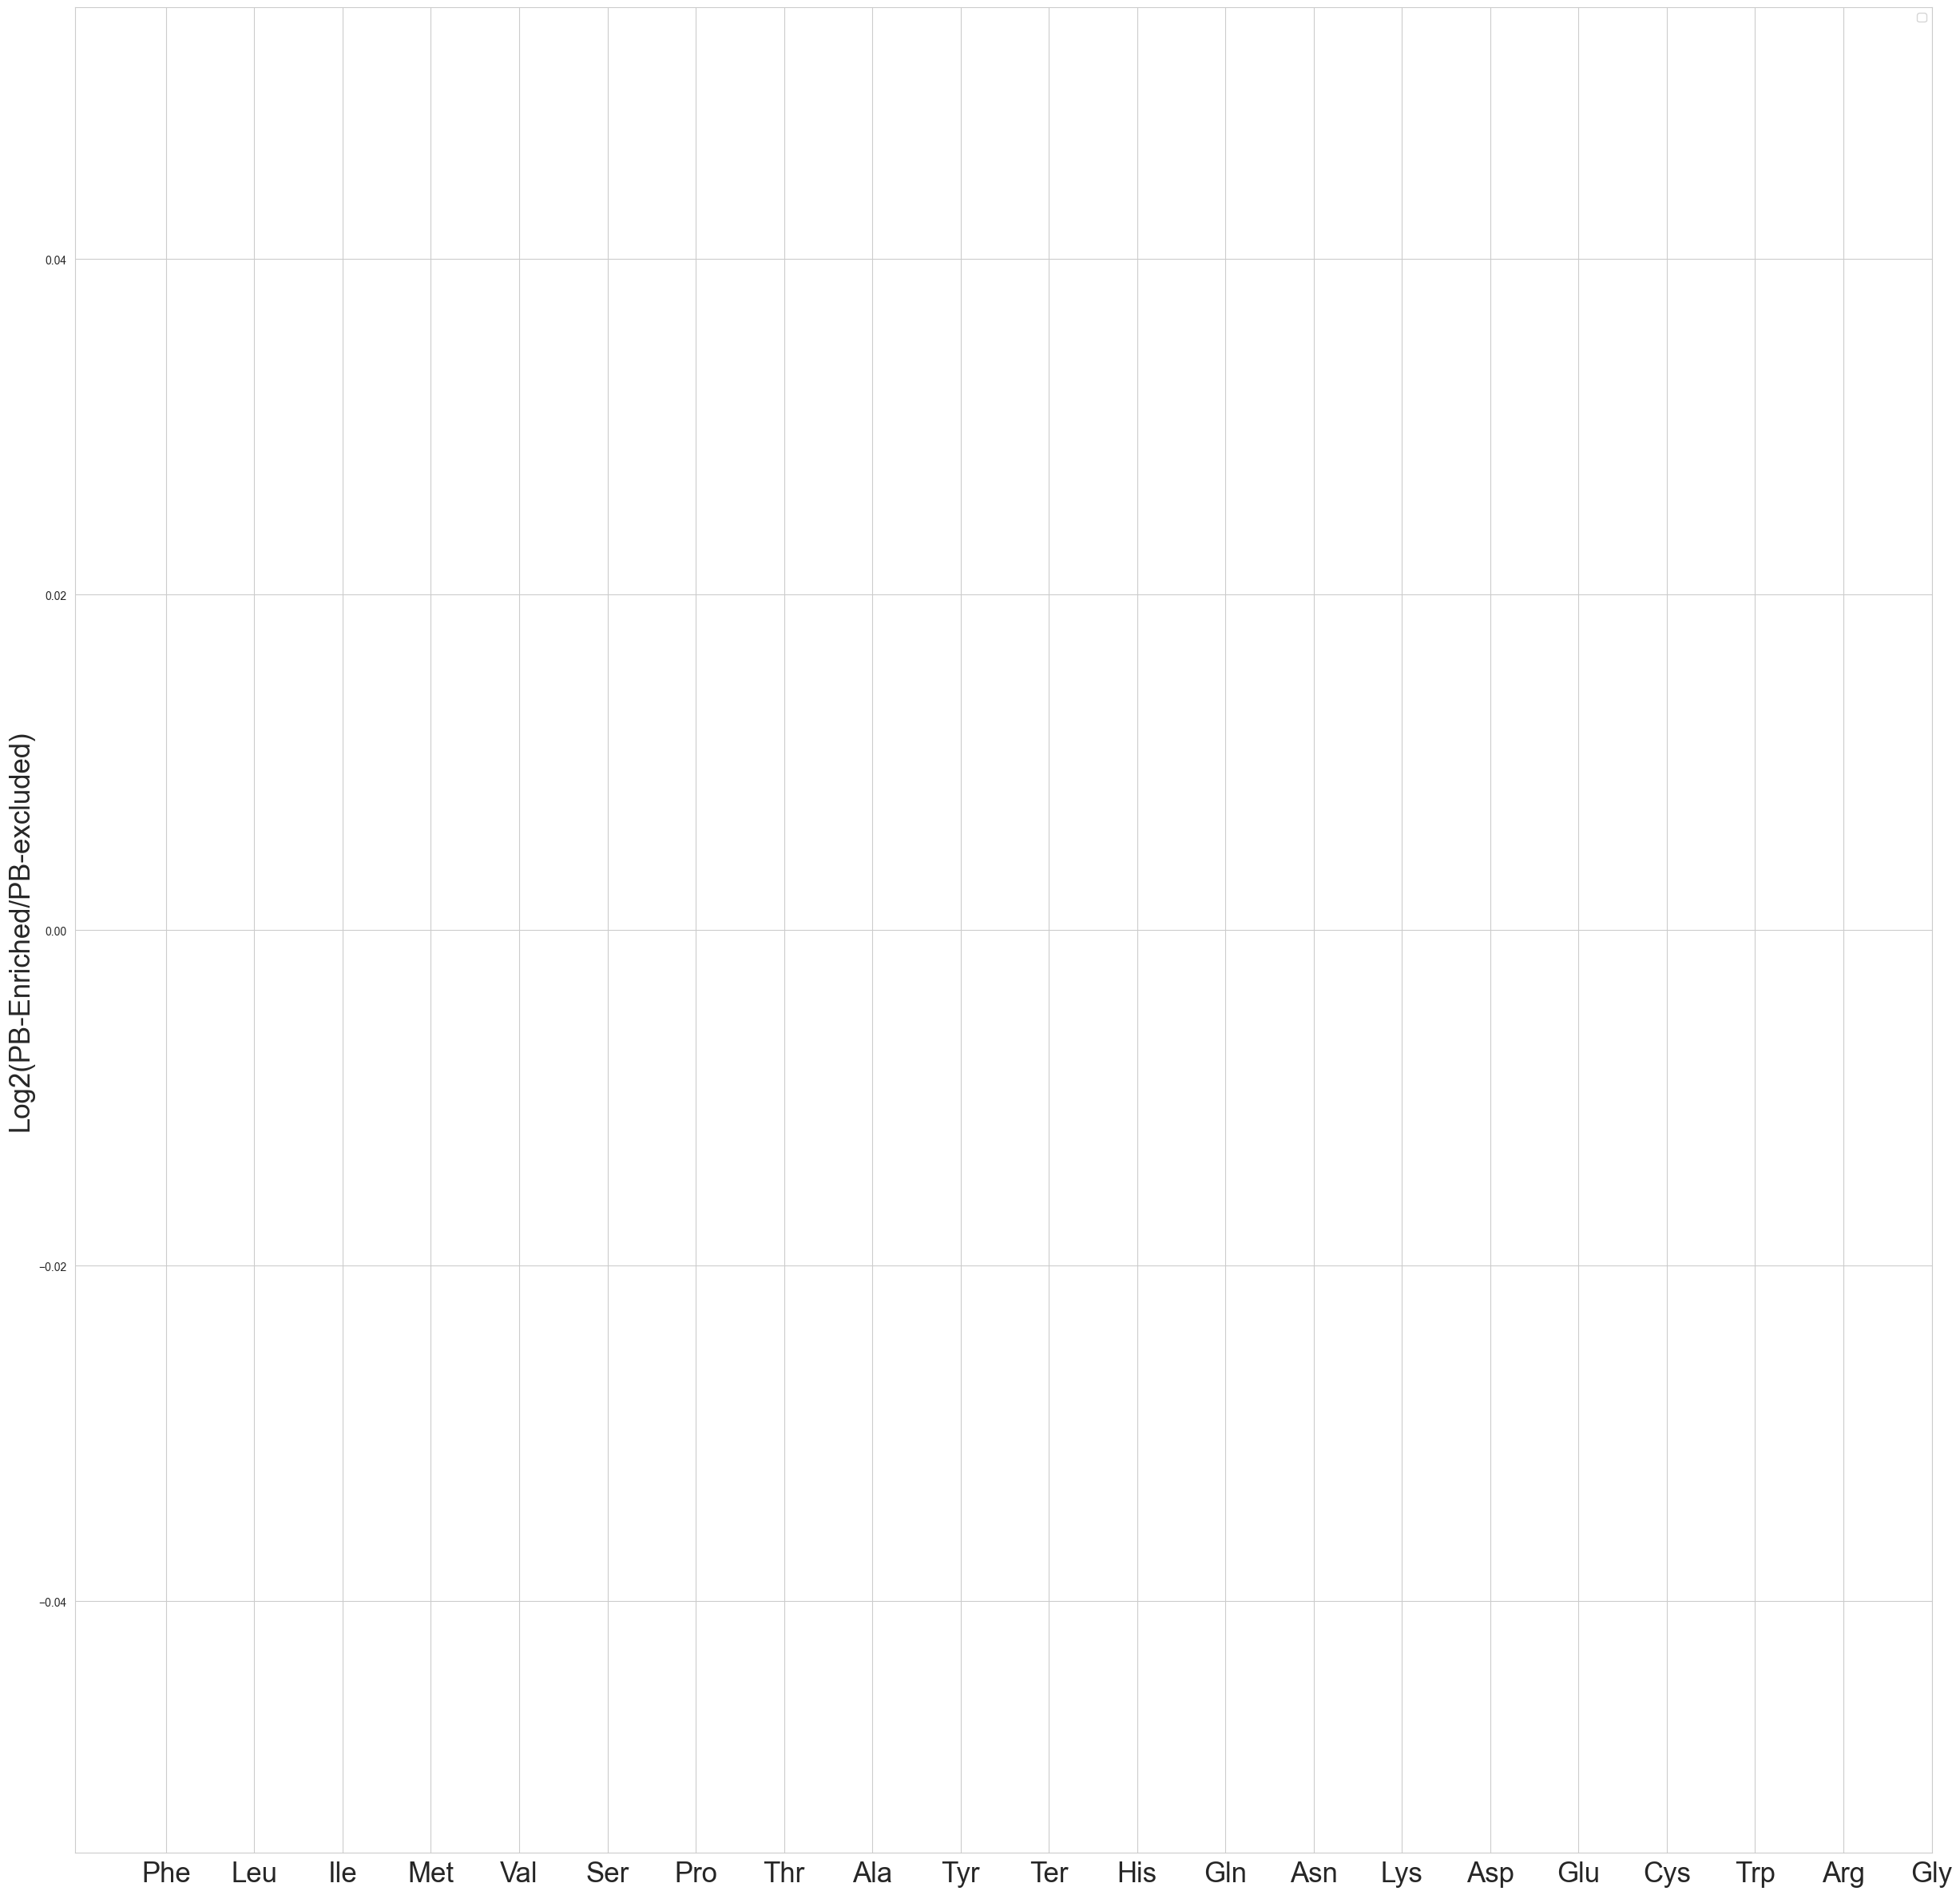

In [345]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.2
offset = 0.2
fig, ax = plt.subplots(figsize=(30,30))

for j in log_ratios.keys():
    for i, v in enumerate(log_ratios[j]):
        ax.bar(ddd[j] + (i * offset), v, width=bar_width,color=colors[j])

ax.set_xticks(list(ddd.values()))
ax.set_xticklabels(log_ratios.keys())

ax.set_ylabel("Log2(PB-Enriched/PB-excluded)",fontsize=25)

plt.xticks(fontsize=25)

ax.legend()
#plt.savefig("amino_GC_corrected_with_PB_all_heat.png")

In [343]:
import random
#random colors for aminoacid groups
colors={k:[ random.random()for j in range(3)] for k in log_ratios.keys()}

In [344]:
#indexes for different amino acids so as not to be overlapping in graph
from collections import defaultdict
ddd=defaultdict(float)
for k,v in enumerate(log_ratios.keys()):
    if k==0:
        index=k
        val=v
        ddd[val]=index
    index=index+len(val)*0.2+1
    ddd[v]=index
    val=v
    

In [12]:
#Rare codon distribution

In [319]:
max_freqs_amino={k:max([rela[j] for j in v]) for k,v in Gen_code.items()}

In [320]:
min_freqs_amino={k:min([rela[j] for j in v]) for k,v in Gen_code.items()}

In [322]:
import numpy as np
avg_freqs_amino={k:np.mean([rela[j] for j in v]) for k,v in Gen_code.items()}

In [323]:
weights_freqs={k:list(map(lambda x: x/sum([rela[j] for j in v]),[rela[j] for j in v])) for k,v in Gen_code.items()}

In [14]:
def MinMax(seq):
    intervals=[seq[v:v+10] for v in range(len(seq)) if len(seq)-v>=10]
    
    inter=[]
    for interval in intervals:

        cluster_score=sum([rela[j]for j in interval])
        cluster_avg=sum([avg_freqs_amino[translation_table[j]]for j in interval])

        if cluster_score>cluster_avg:
            Max=sum([rela[j]-avg_freqs_amino[translation_table[j]] for j in interval])/sum([max_freqs_amino[translation_table[j]]-avg_freqs_amino[translation_table[j]] for j in interval])
            inter+=[Max*100]

        if cluster_score<cluster_avg:
            Min=sum([avg_freqs_amino[translation_table[j]]-rela[j] for j in interval])/sum([avg_freqs_amino[translation_table[j]]-min_freqs_amino[translation_table[j]] for j in interval])
            inter+=[-Min*100]
    return inter

In [15]:
import random
def bootstrap(seq):
    sequence=[]
    for j in seq:
        sequence.append(random.choices(Gen_code[translation_table[j]],weights=weights_freqs[translation_table[j]],k=1)[0])
    return sequence

In [177]:
def backround(seq):
    variations=[bootstrap(seq)for i in range(200)]
    scores=np.array([MinMax(i)for i in variations],dtype="object")
    binned_scores=np.array([np.histogram(score, bins=np.arange(-100,100,10))[0]for score in scores])
    return np.mean(binned_scores, axis=0),np.std(binned_scores,axis=0)
    #return scores

In [178]:
enriched_bg={k:backround(codons[k]) for k in mock_enriched if k in codons.keys()}

In [179]:
random_bin_sums=np.sum(list(enriched_bg.values()),axis=0)[0]

In [72]:
mean_windows_bg={k:list(enumerate(np.mean(v, axis=0))) for k,v in enriched_bg.items()}

In [150]:
all_clusters={k:MinMax(codons[k])for k in codons.keys()}

In [156]:
all_clusters_windows={k:list(enumerate(v))for k,v in all_clusters.items()}

In [180]:
enriched_clusters={k:MinMax(codons[k])for k in mock_enriched if k in codons.keys()}

In [181]:
enriched_bin_sums=np.histogram([j for v in enriched_clusters.values() for j in v], bins=np.arange(-100,100,10))[0]

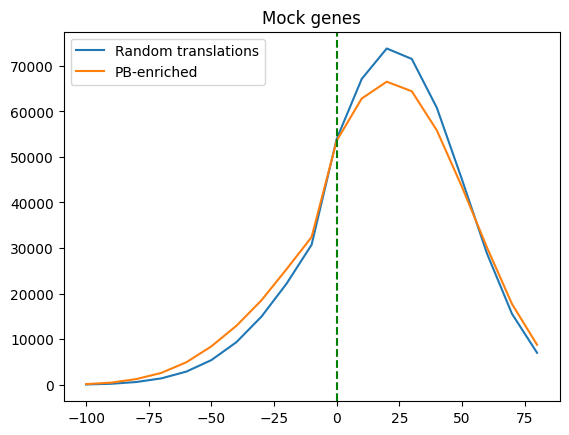

In [184]:
fig, ax=plt.subplots()
sns.lineplot(x=np.arange(-100,90,10),y=random_bin_sums)
sns.lineplot(x=np.arange(-100,90,10),y=enriched_bin_sums)
ax.legend(["Random translations","PB-enriched"])
ax.set_title("Mock genes")
plt.axvline(x=0,linestyle="--", color="green")
plt.savefig("mock_distribution_MinMax.png")

In [110]:
diff_std=defaultdict(list)
for i in mock_enriched:
    if i in codons.keys():
        mean_counts, stds= backround(codons[i])
        exp_counts=np.histogram(MinMax(codons[i]),bins=np.arange(-100,100,10))[0]
    diff_std[i]=(exp_counts-mean_counts)/stds   

C:\Users\nwntas\AppData\Local\Temp\ipykernel_19896\405446227.py:6: RuntimeWarning: invalid value encountered in true_divide
  diff_std[i]=(exp_counts-mean_counts)/stds
C:\Users\nwntas\AppData\Local\Temp\ipykernel_19896\405446227.py:6: RuntimeWarning: divide by zero encountered in true_divide
  diff_std[i]=(exp_counts-mean_counts)/stds


In [154]:
windows_coords={k:list(enumerate(v)) for k,v in enriched_clusters.items()}      

In [168]:
Bg_freqs=defaultdict(int)
for v in all_clusters_windows.values():
    if len(v)<=250:
        continue
    for j in v[-250:]:
        if j[1]<-20:
            Bg_freqs[len(v)-j[0]]+=1

In [169]:
Bg_freqs={k: v/len(codons.keys())for k,v in Bg_freqs.items()}

In [170]:
Bg_freqs=dict(sorted(Bg_freqs.items(),key=lambda x: x[0]))

In [166]:
Min_freqs={k: v/len(enriched_clusters.keys())for k,v in Min_freqs.items()}

In [167]:
Min_freqs=dict(sorted(Min_freqs.items(),key=lambda x: x[0]))

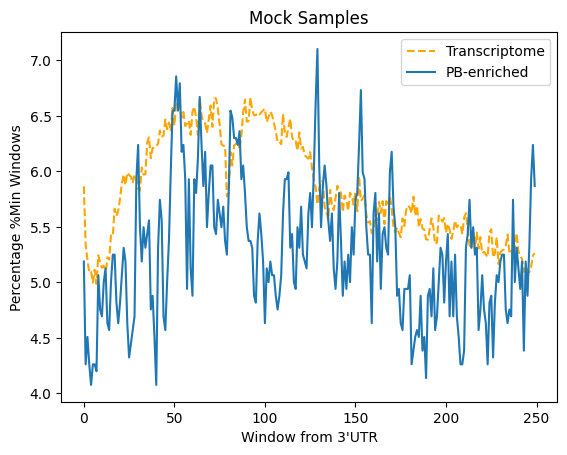

In [175]:
fig, ax=plt.subplots()
sns.lineplot(x=list(range(250)),y=list(map(lambda x:x*100,Bg_freqs.values())),linestyle="--",color="orange")
sns.lineplot(x=list(range(250)),y=list(map(lambda x: x*100,Min_freqs.values())))
ax.set_ylabel("Percentage %Min Windows")
ax.set_xlabel("Window from 3'UTR")
ax.set_title("Mock Samples")

ax.legend(["Transcriptome","PB-enriched"])

plt.savefig("Rare_codon_clusters_3UTR_mock.png")

In [270]:
Min_pos={k:list(map(lambda x: x[0],filter(lambda x: x[1]<-20,enumerate(v)))) for k,v in enriched_clusters.items()}

In [273]:
aap=Counter([j for l in Min_pos.values() for j in l])

In [281]:
lul={k:v/sum(aap.values())*100 for k,v in aap.items()}

C:\Users\nwntas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 800.0)

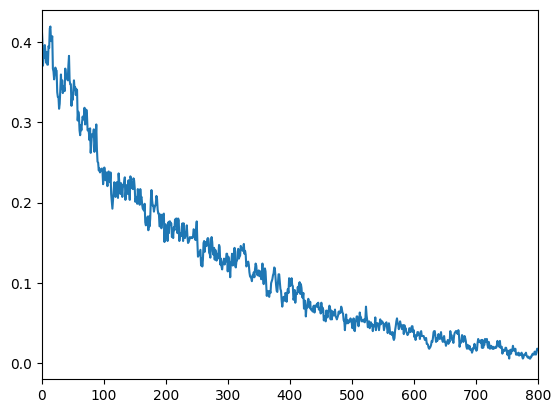

In [284]:
fig, ax=plt.subplots()
sns.lineplot(list(aap.keys()),list(lul.values()))
ax.set_xlim([0,800])

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
results=MinMax(codons['AT1G08370.1'])

In [192]:
colors=["b" if i>0 else "r" for i in results]

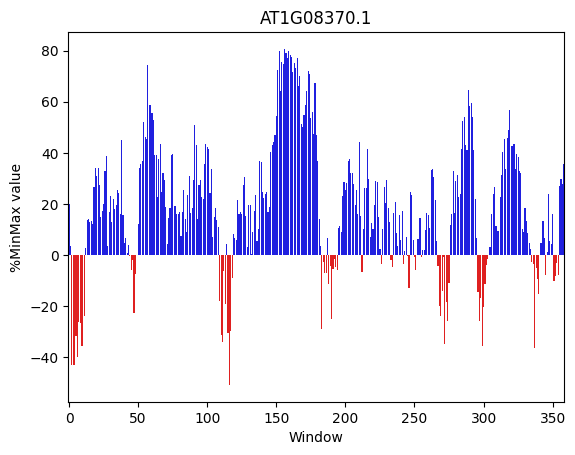

In [204]:
fig, ax=plt.subplots()
sns.barplot(y=results, x=list(range(len(results))),palette=colors)
ax.set_xticks(list(np.arange(0,len(results),50)))
ax.set_ylabel("%MinMax value")
ax.set_xlabel("Window")
ax.set_title('AT1G08370.1')
plt.savefig("Example_MinMax.png")

In [200]:
list(np.arange(0,len(results),50))

[0, 50, 100, 150, 200, 250, 300, 350]

<AxesSubplot: ylabel='Count'>

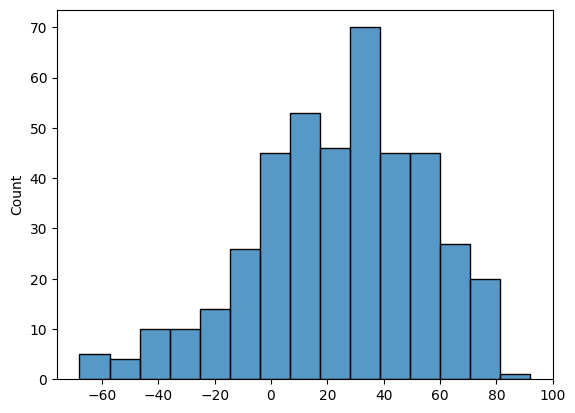

In [240]:
sns.histplot(MinMax(codons["AT1G01010.1"]))

In [235]:
arf=[j for k in backround(codons["AT1G01010.1"]) for j in k]

In [233]:
np.mean(backround(codons["AT1G01010.1"])[:,90])

23.26891531868773

In [221]:
import scipy

In [230]:
scipy.stats.shapiro(backround(codons["AT1G01010.1"])[:,98])

ShapiroResult(statistic=0.9938849210739136, pvalue=0.5836442708969116)

In [ ]:
#Enriched amino distribution across enriched genes

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [77]:
def amino_density(seq,amino):
    sequence_windows=[seq[i:i+15] for i in range(len(seq)) if len(seq)-21>=i]
    density=list(map(lambda x:[translation_table[i] for i in x].count(amino),sequence_windows))
    return density

In [80]:
all_densities={gene:amino_density(codons[gene],"Ser") for gene in mock_enriched if gene in codons.keys()}

In [81]:
np.mean(list(map(lambda x: x[1][:300],filter(lambda x: len(x[1])>=300 and x[0] in coRegs,all_densities.items()))),axis=0)

array([1.5       , 1.66666667, 1.83333333, 1.83333333, 1.70833333,
       1.70833333, 1.54166667, 1.625     , 1.625     , 1.70833333,
       1.625     , 1.58333333, 1.79166667, 1.83333333, 2.04166667,
       1.875     , 1.70833333, 1.54166667, 1.54166667, 1.54166667,
       1.54166667, 1.625     , 1.54166667, 1.54166667, 1.45833333,
       1.45833333, 1.5       , 1.375     , 1.29166667, 1.20833333,
       1.29166667, 1.41666667, 1.5       , 1.33333333, 1.33333333,
       1.375     , 1.375     , 1.41666667, 1.375     , 1.66666667,
       1.70833333, 1.58333333, 1.54166667, 1.45833333, 1.54166667,
       1.66666667, 1.625     , 1.625     , 1.79166667, 1.75      ,
       1.70833333, 1.625     , 1.66666667, 1.75      , 1.5       ,
       1.5       , 1.5       , 1.75      , 1.83333333, 1.75      ,
       1.58333333, 1.58333333, 1.54166667, 1.45833333, 1.54166667,
       1.45833333, 1.5       , 1.375     , 1.25      , 1.16666667,
       1.125     , 1.08333333, 0.79166667, 0.70833333, 0.66666

In [71]:
coRegs=list(map(lambda x: x+".1",coRegs))